# Table of contents <a name="toc"></a>
1. [Beginning EDA](#beginningeda)
2. [First Normalization](#firstnorm)
3. [Correlations](#correlations)
4. [Selecting Features](#selectingfeatures)
5. [Regression & Summary](#regressone)
6. [Reassess Dataset](#freshapproach)
7. [Fix Normalization & Start Again](#normaltwo)
8. [Insights](#insights)

## Beginning EDA <a name="beginningeda"></a>
[Return to TOC](#toc)

In [1]:
# Import the tools I think I'll need to start with:
import pandas as pd
import matplotlib.pyplot as plt
# Following line now commented-out, having saved the Pandas Profile report
# from pandas_profiling import ProfileReport

In [28]:
%matplotlib inline

In [2]:
df = pd.read_excel('ENB2012_data.xlsx')

In [3]:
# Inspect the data directly
print(df.head())

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [4]:
# List all variables
for col in df.columns:
    print(col)

X1
X2
X3
X4
X5
X6
X7
X8
Y1
Y2


In [81]:
# Basic descriptive statistics for all variables
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [5]:
# Generate PandasProfiling report, save html version to notebook directory
# report = ProfileReport(df, title='Building HVAC: First Look', html={'style':{'full_width':True}})
# report.to_file(output_file='HVACReport.html')


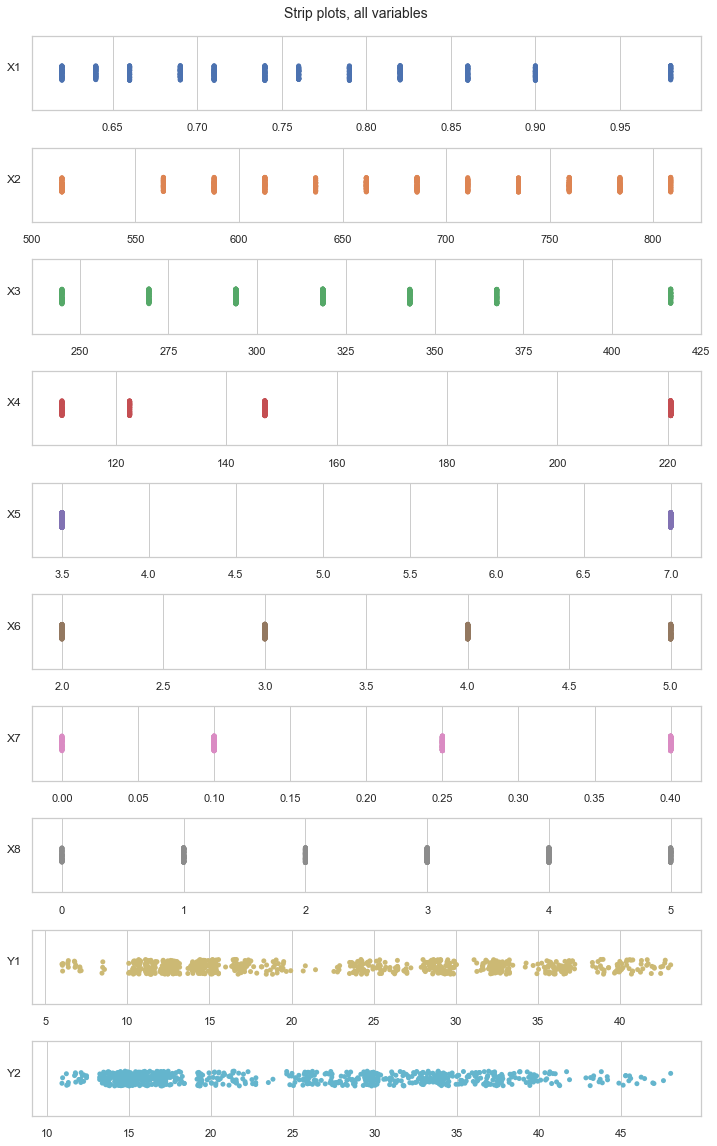

In [193]:
# stripplot distribution of all variables
import seaborn as sns # for chart method
import itertools # for cycling palette
sns.set(style="whitegrid")
palette = itertools.cycle(sns.color_palette()) # different color each subplot
fig = plt.figure(figsize=(12,8)) # roomy display
fig.suptitle('Strip plots, all variables', y=2.05, fontsize=14)
plt.subplots_adjust(top = 2, hspace = 0.5) # cutomize space between
count = 1 # subplot counter
ax = fig.add_subplot(10,1,1) # subplots grid defined
for i in df: # loop through columns, grabbin column name as i
    ax = fig.add_subplot(10,1,count) # plot in this position
    sns.stripplot(x=df[i], color = next(palette)) # plot with color from palette cycle
    ax.set_ylabel(i, rotation=0) # move column name to left side and upright
    ax.set_xlabel('') # remove column name from between plots
    count += 1 # advance subplot counter

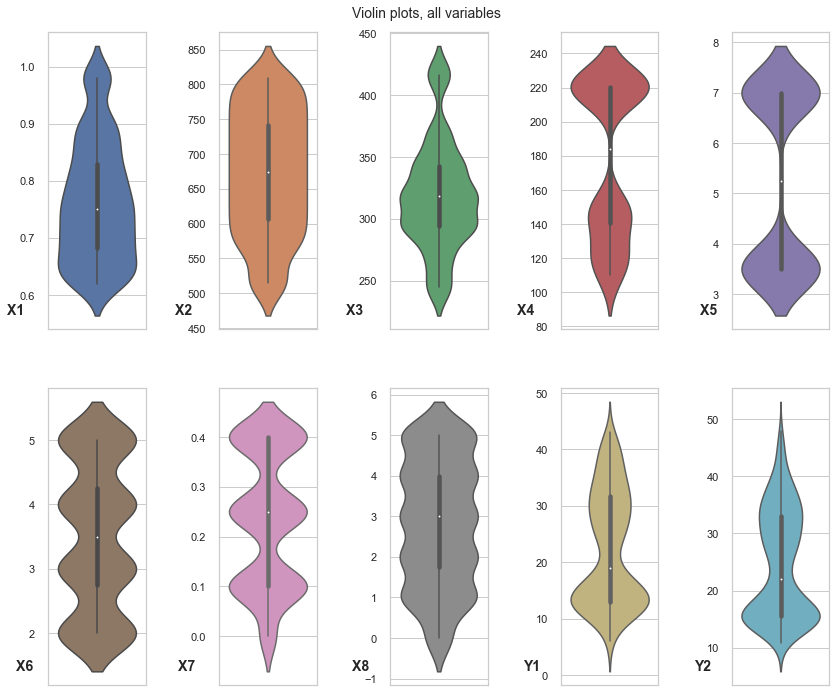

In [187]:
# violinplot distribution of all variables
sns.set(style="whitegrid")
palette = itertools.cycle(sns.color_palette()) # different color each subplot
fig = plt.figure(figsize=(14,12)) # roomy display
fig.suptitle('Violin plots, all variables', y=.91, fontsize=14)
plt.subplots_adjust(wspace = 0.75) # cutomize space between
count = 1 # subplot counter
ax = fig.add_subplot(2,5,1) # subplots grid defined
for i in df: # loop through columns, grabbin column name as i
    ax = fig.add_subplot(2,5,count) # plot in this position
    sns.violinplot(x=df[i], orient = "v", color = next(palette)) # plot with color from palette cycle
    ax.set_ylabel(i, rotation=0, fontsize=14, y=0.04, weight='bold') # rotate label upright
    count += 1 # advance subplot counter

In [4]:
# Create separate heating and cooling dataframes
df_heat = df.drop('Y2', 1)
df_cool = df.drop('Y1', 1)

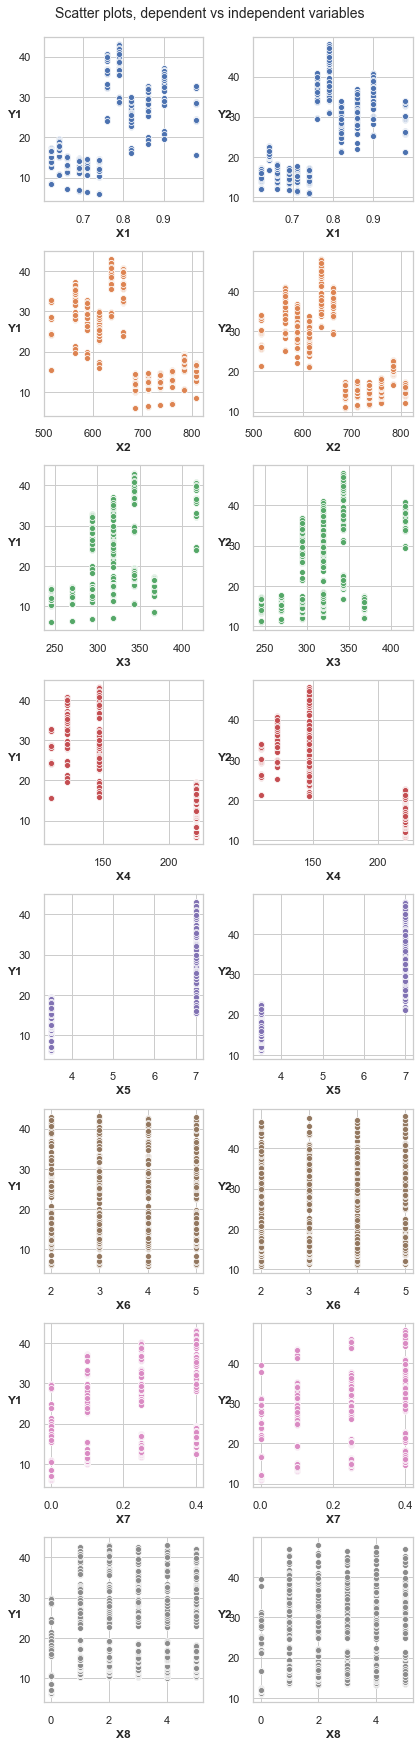

In [197]:
palette = itertools.cycle(sns.color_palette()) # different color each subplot
fig, axes = plt.subplots(8,2, figsize=(6,24)) # subplots grid defined, method allows axes arg in sns.jointplot
fig.suptitle('Scatter plots, dependent vs independent variables', y=1.01, fontsize=14)
count = 0 # axes row counter
for indcol in df_heat:
    if indcol != 'Y1': # exclude dependent variable self plot
        rowcolor = next(palette) # iteration method to select next color in series
        plot_y1 = sns.scatterplot(x=indcol, y='Y1', data=df_heat, color=rowcolor, ax=axes[count,0])
        plot_y1.set_ylabel('Y1', rotation=0, weight='bold')
        plot_y1.set_xlabel(indcol, weight='bold')
        plot_y2 = sns.scatterplot(x=indcol, y='Y2', data=df_cool, color=rowcolor, ax=axes[count,1])
        plot_y2.set_ylabel('Y2', rotation=0, weight='bold')
        plot_y2.set_xlabel(indcol, weight='bold')
        count += 1 # advance subplot counter
        
plt.tight_layout()

## First Normalization <a name="firstnorm"></a>
[Return to TOC](#toc)

In [3]:
# normalize original dataset and replot variable pairings

# create empty dataframe copy with same index
dfnorm = pd.DataFrame(data=None, columns=df.columns).reindex_like(df)

# loop through df normalization
for i in df.columns:
    # set max for column
    colmax = df[i].max()
    # core function
    dfnorm[i] = df[i]/colmax

In [4]:
dfnorm.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.779762,0.830808,0.764706,0.800926,0.750000,0.700000,0.585938,0.562500,0.517568,0.511925
std,0.107936,0.108950,0.104745,0.204834,0.250163,0.223753,0.333051,0.310192,0.234111,0.198070
min,0.632653,0.636364,0.588235,0.500000,0.500000,0.400000,0.000000,0.000000,0.139443,0.226941
25%,0.696429,0.750000,0.705882,0.638889,0.500000,0.550000,0.250000,0.350000,0.301450,0.325213
50%,0.765306,0.833333,0.764706,0.833333,0.750000,0.700000,0.625000,0.600000,0.439675,0.459713
75%,0.846939,0.916667,0.823529,1.000000,1.000000,0.850000,1.000000,0.800000,0.734745,0.689829
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# Create separate heating and cooling dataframes from normalized dataset
dfnorm_heat = dfnorm.drop('Y2', 1)
dfnorm_cool = dfnorm.drop('Y1', 1)

In [7]:
# Working out syntax to separate datasets by X5 value
dfnorm_heat_lo = dfnorm_heat.loc[dfnorm_heat['X5'] == 0.5]
dfnorm_heat_lo.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
count,384.000000,384.000000,384.000000,384.0,384.0,384.000000,384.000000,384.000000,384.000000
mean,0.690476,0.924242,0.735294,1.0,0.5,0.700000,0.585938,0.562500,0.309478
std,0.041989,0.051820,0.100591,0.0,0.0,0.223899,0.333269,0.310394,0.061990
min,0.632653,0.848485,0.588235,1.0,0.5,0.400000,0.000000,0.000000,0.139443
25%,0.653061,0.878788,0.647059,1.0,0.5,0.550000,0.250000,0.350000,0.268561
50%,0.688776,0.924242,0.735294,1.0,0.5,0.700000,0.625000,0.600000,0.301276
75%,0.724490,0.969697,0.823529,1.0,0.5,0.850000,1.000000,0.800000,0.350116
max,0.755102,1.000000,0.882353,1.0,0.5,1.000000,1.000000,1.000000,0.452900


In [5]:
# Separate remaining datasets by X5 value
dfnorm_heat_lo = dfnorm_heat.loc[dfnorm_heat['X5'] == 0.5]
dfnorm_heat_lo = dfnorm_heat_lo.drop('X5', 1)
dfnorm_cool_lo = dfnorm_cool.loc[dfnorm_cool['X5'] == 0.5]
dfnorm_cool_lo = dfnorm_cool_lo.drop('X5', 1)
dfnorm_heat_hi = dfnorm_heat.loc[dfnorm_heat['X5'] == 1]
dfnorm_heat_hi = dfnorm_heat_hi.drop('X5', 1)
dfnorm_cool_hi = dfnorm_cool.loc[dfnorm_cool['X5'] == 1]
dfnorm_cool_hi = dfnorm_cool_hi.drop('X5', 1)

In [6]:
import seaborn as sns

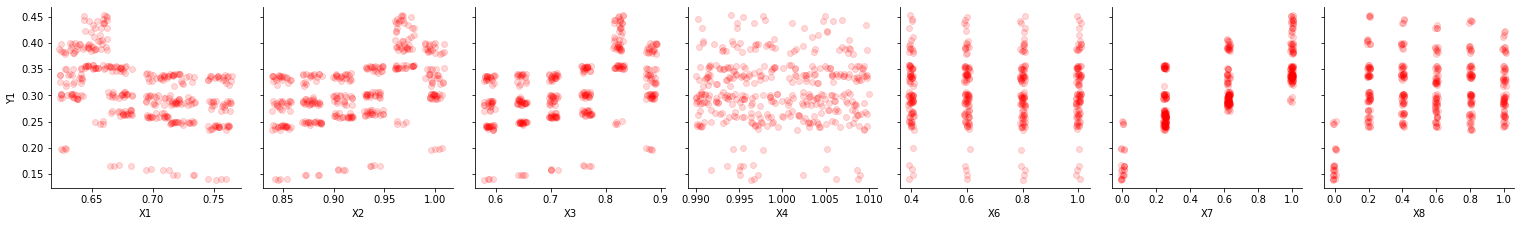

In [25]:
# Adapting 6th example in https://seaborn.pydata.org/tutorial/axis_grids.html#plotting-pairwise-data-relationships
# to create row of regplots for each independent variable against the dependent
g = sns.PairGrid(dfnorm_heat_lo, y_vars=["Y1"], x_vars=["X1", "X2", "X3", "X4", "X6" ,"X7", "X8"], height=3)
g.map(sns.regplot, scatter_kws={'alpha':0.15,'color': 'red'}, line_kws={'color': 'black'}, x_jitter=.01)
g.fig.suptitle('dfnorm_heat_lo', x=0.05, y=1.08, fontsize=18)
plt.show()

In [3]:
# Now that we've fine tuned output, define as function
def reg_row(dataset, indvar, rowcolor):
    # returns name of dataframe; .name method didn't work; https://stackoverflow.com/questions/54137694/how-to-print-dataframe-name-in-title-of-a-plot
    datasetname =[x for x in globals() if globals()[x] is dataset][0] 
    g = sns.PairGrid(dataset, y_vars=[indvar], x_vars=["X1", "X2", "X3", "X4", "X6" ,"X7", "X8"], height=3)
    g.map(sns.regplot, scatter_kws={'alpha':0.15,'color': rowcolor}, line_kws={'color': 'black'}, x_jitter=.01)
    g.fig.suptitle(str(datasetname), x=0.05, y=1.08, fontsize=18)
    plt.show()

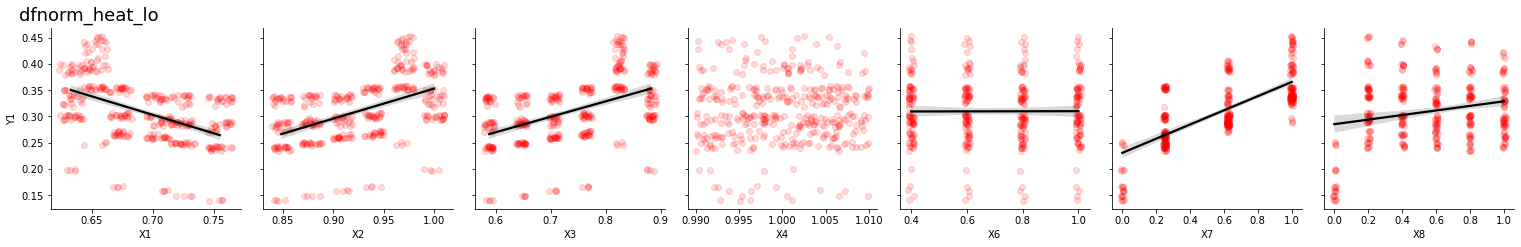

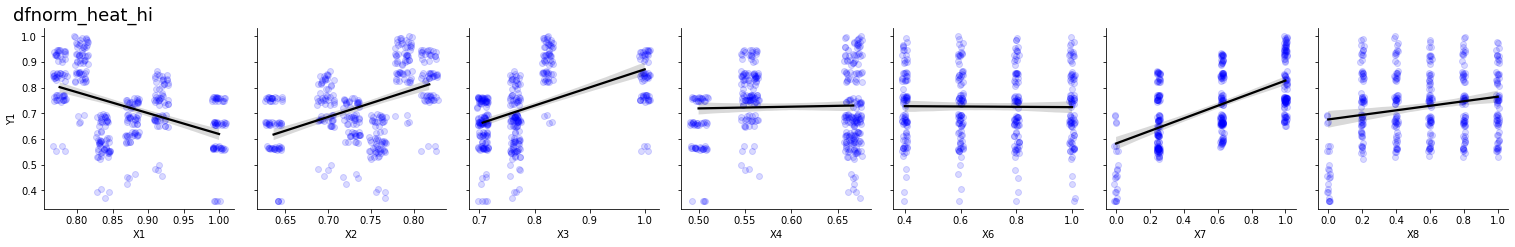

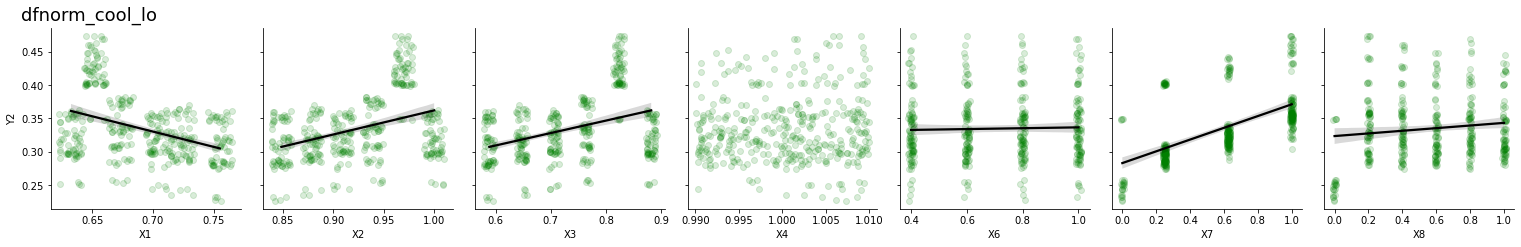

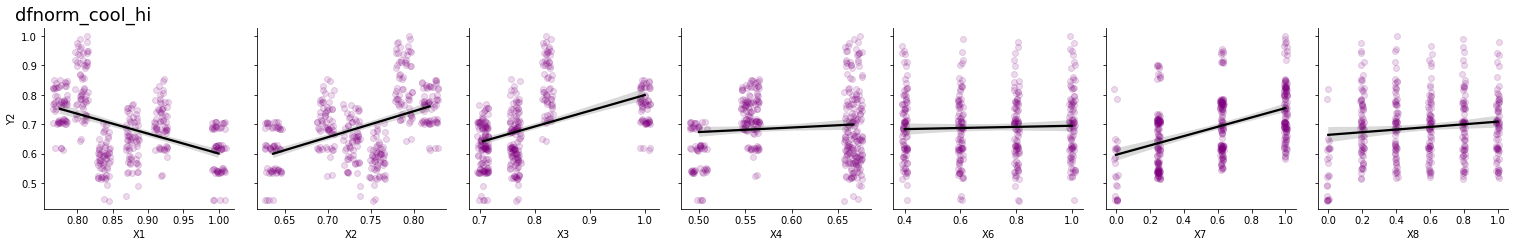

In [4]:
reg_row(dfnorm_heat_lo, "Y1", 'red')
reg_row(dfnorm_heat_hi, "Y1", 'blue')
reg_row(dfnorm_cool_lo, "Y2", 'green')
reg_row(dfnorm_cool_hi, "Y2", 'purple')

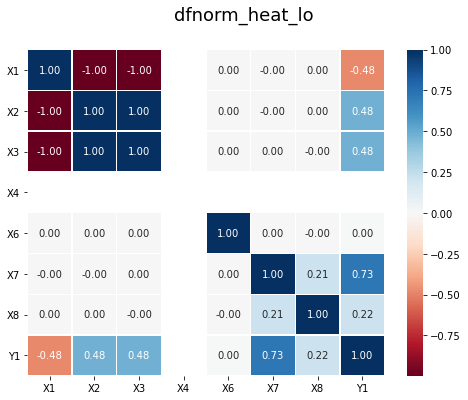

In [65]:
# Working out desired correlation matrix appearance
dfnhl_corr = dfnorm_heat_lo.corr()
datasetname =[x for x in globals() if globals()[x] is dfnorm_heat_lo][0] # that funky dataframe name code
plt.figure(figsize=(8,6))
sns.heatmap(dfnhl_corr, annot=True, linewidths=0.5, cmap='RdBu', fmt=".2f")
plt.yticks(rotation = 0)
plt.suptitle(str(datasetname), fontsize=18)
plt.show()

## Correlations <a name="correlations"></a>
[Return to TOC](#toc)

In [7]:
# Correlation matrix function for the four dataframes
def hvaccorrmap(dataset):
    df_corr = dataset.corr()
    datasetname =[x for x in globals() if globals()[x] is dataset][0]
    plt.figure(figsize=(8,6))
    sns.heatmap(df_corr, annot=True, linewidths=0.5, cmap='RdBu', fmt=".2f")
    plt.yticks(rotation = 0)
    plt.suptitle(str(datasetname), fontsize=18)
    plt.show()

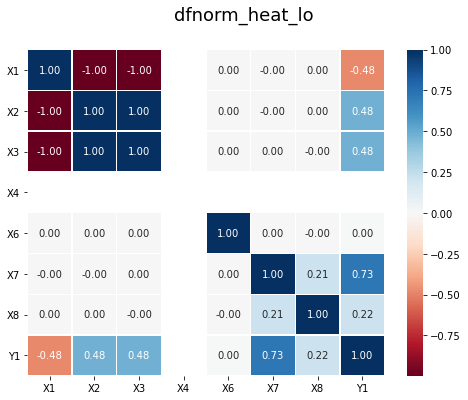

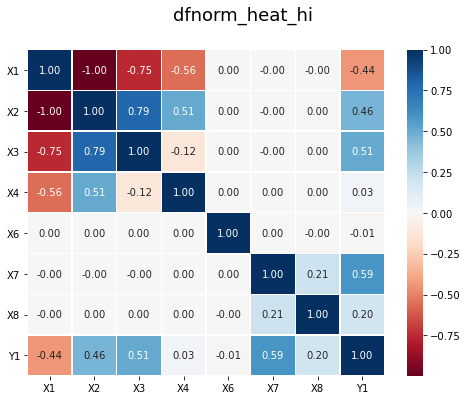

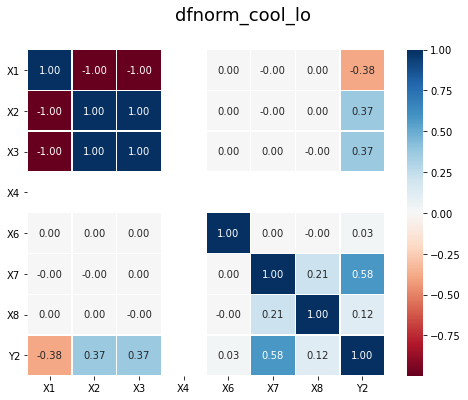

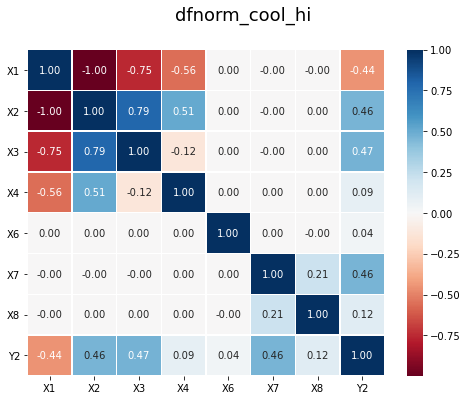

In [8]:
list = [dfnorm_heat_lo, dfnorm_heat_hi, dfnorm_cool_lo, dfnorm_cool_hi]
for dataset in list:
    hvaccorrmap(dataset)

In [1]:
# Quick start code to prepare data as above without visualizations
# DON'T RUN THIS CELL IF YOU ALREADY RAN ALL THE ABOVE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_excel('ENB2012_data.xlsx')

# normalize original dataset and replot variable pairings
# create empty dataframe copy with same index
dfnorm = pd.DataFrame(data=None, columns=df.columns).reindex_like(df)
# loop through df normalization
for i in df.columns:
    # set max for column
    colmax = df[i].max()
    # core function
    dfnorm[i] = df[i]/colmax
    
# Create separate heating and cooling dataframes from normalized dataset
dfnorm_heat = dfnorm.drop('Y2', 1)
dfnorm_cool = dfnorm.drop('Y1', 1)

# Separate remaining datasets by X5 value
dfnorm_heat_lo = dfnorm_heat.loc[dfnorm_heat['X5'] == 0.5]
dfnorm_heat_lo = dfnorm_heat_lo.drop('X5', 1)
dfnorm_cool_lo = dfnorm_cool.loc[dfnorm_cool['X5'] == 0.5]
dfnorm_cool_lo = dfnorm_cool_lo.drop('X5', 1)
dfnorm_heat_hi = dfnorm_heat.loc[dfnorm_heat['X5'] == 1]
dfnorm_heat_hi = dfnorm_heat_hi.drop('X5', 1)
dfnorm_cool_hi = dfnorm_cool.loc[dfnorm_cool['X5'] == 1]
dfnorm_cool_hi = dfnorm_cool_hi.drop('X5', 1)


In [6]:
# Split our four datasets into 90/10 training/testing sets and save files for replicability
# Once all code has been worked out, and can be run in one sitting from split through 
# regression and test, it will not be necessary to save out the various files.

from sklearn.model_selection import train_test_split

In [9]:
heatlo_train, heatlo_test = train_test_split(dfnorm_heat_lo, test_size=0.1)
heatlo_train.describe()

,X1,X2,X3,X4,X6,X7,X8,Y1
count,345.000000,345.000000,345.000000,345.0,345.000000,345.000000,345.000000,345.000000
mean,0.690802,0.923935,0.734697,1.0,0.702029,0.591304,0.556522,0.309445
std,0.042661,0.052644,0.102192,0.0,0.222097,0.337646,0.315988,0.063234
min,0.632653,0.848485,0.588235,1.0,0.400000,0.000000,0.000000,0.139443
25%,0.653061,0.878788,0.647059,1.0,0.600000,0.250000,0.200000,0.267517
50%,0.704082,0.909091,0.705882,1.0,0.800000,0.625000,0.600000,0.301624
75%,0.724490,0.969697,0.823529,1.0,0.800000,1.000000,0.800000,0.350116
max,0.755102,1.000000,0.882353,1.0,1.000000,1.000000,1.000000,0.452900


In [10]:
heatlo_test.describe()

,X1,X2,X3,X4,X6,X7,X8,Y1
count,39.000000,39.000000,39.000000,39.0,39.000000,39.000000,39.000000,39.000000
mean,0.687598,0.926962,0.740573,1.0,0.682051,0.538462,0.615385,0.309769
std,0.035857,0.044361,0.086113,0.0,0.241565,0.291257,0.252918,0.050335
min,0.632653,0.848485,0.588235,1.0,0.400000,0.250000,0.200000,0.241067
25%,0.653061,0.893939,0.676471,1.0,0.400000,0.250000,0.400000,0.269026
50%,0.673469,0.939394,0.764706,1.0,0.600000,0.625000,0.600000,0.296520
75%,0.714286,0.969697,0.823529,1.0,0.900000,0.625000,0.800000,0.335963
max,0.755102,1.000000,0.882353,1.0,1.000000,1.000000,1.000000,0.449188


In [6]:
# Create function that splits and saves

def splitnsave(dataset):
    datasetname =[x for x in globals() if globals()[x] is dataset][0] # that funky dataframe name code
    df_train, df_test = train_test_split(dataset, test_size=0.1)
    df_train.to_csv(datasetname + '_train.csv', index=False)
    df_test.to_csv(datasetname + '_test.csv', index=False)
    
#splitnsave(dfnorm_heat_lo)

# It has become clear at this point that for the heat_lo and cool_lo subsets, X4 only has one value (1.0)
It seems appropriate to eliminate this variable from the regression of the heat_lo and cool_lo subsets.
This can be seen in the scatter plots for the four subsets. However, the constant value for X4 in these two subsets is masked by the jitter.

In [13]:
# Separate remaining datasets by X5 value, drop X5 from all subsets, and X4 from "_lo" subsets
dfnorm_heat_lo = dfnorm_heat.loc[dfnorm_heat['X5'] == 0.5]
dfnorm_heat_lo = dfnorm_heat_lo.drop(['X4','X5'], 1)
dfnorm_cool_lo = dfnorm_cool.loc[dfnorm_cool['X5'] == 0.5]
dfnorm_cool_lo = dfnorm_cool_lo.drop(['X4','X5'], 1)
dfnorm_heat_hi = dfnorm_heat.loc[dfnorm_heat['X5'] == 1]
dfnorm_heat_hi = dfnorm_heat_hi.drop('X5', 1)
dfnorm_cool_hi = dfnorm_cool.loc[dfnorm_cool['X5'] == 1]
dfnorm_cool_hi = dfnorm_cool_hi.drop('X5', 1)

In [16]:
# with corrected "_lo" subsets, generate and save all train/test sets
list = [dfnorm_heat_lo, dfnorm_heat_hi, dfnorm_cool_lo, dfnorm_cool_hi]
for dataset in list:
    splitnsave(dataset)

# Selecting Features <a name="selectingfeatures"></a>
### Read the four training sets, evaluate for optimal feature selection
[Return to TOC](#toc)

In [1]:
# Quick start code to prepare data as above without visualizations
# DON'T RUN THIS CELL IF YOU ALREADY RAN ALL THE ABOVE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

# Alternately "from sklearn.linear_model import LinearRegression" for shorter call
from sklearn import linear_model

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Read all 4 training sets
dfcoolhi = pd.read_csv('dfnorm_cool_hi_train.csv')
dfcoollo = pd.read_csv('dfnorm_cool_lo_train.csv')
dfheathi = pd.read_csv('dfnorm_heat_hi_train.csv')
dfheatlo = pd.read_csv('dfnorm_heat_lo_train.csv')

In [30]:
def pickfeat(dftrain):
    datasetname =[x for x in globals() if globals()[x] is dftrain][0] # that funky dataframe name code
    train_X = dftrain.iloc[:, :-1].values # X & Y arrays
    train_Y = dftrain.iloc[:, -1].values
    linreg = linear_model.LinearRegression() # create object
    rfecv = RFECV(estimator=linreg, step=1, scoring=None) # create evaluator using linreg model; score by R^2
    rfecv.fit(train_X, train_Y) # fit data to evaluator
    print("Optimal number of features for ",datasetname,": %d" % rfecv.n_features_)
    # Plot number of features VS. cross-validation scores
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation using R^2")
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.show()
    print(datasetname)
    print("Variable:   Feature Rank:") # List rank of features
    print("\n".join("       {}   {}".format(x, y) for x, y in
                zip(dftrain.iloc[:, :-1].columns.tolist(),rfecv.ranking_)))

Optimal number of features for  dfcoolhi : 6


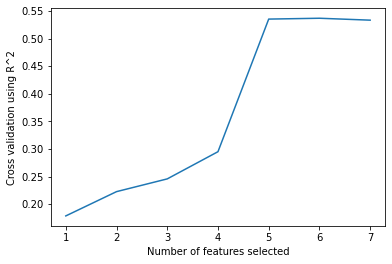

dfcoolhi
Variable:   Feature Rank:
       X1   1
       X2   1
       X3   1
       X4   1
       X6   1
       X7   1
       X8   2
Optimal number of features for  dfcoollo : 6


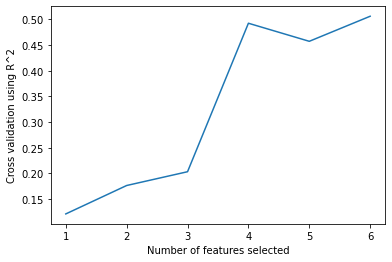

dfcoollo
Variable:   Feature Rank:
       X1   1
       X2   1
       X3   1
       X6   1
       X7   1
       X8   1
Optimal number of features for  dfheathi : 6


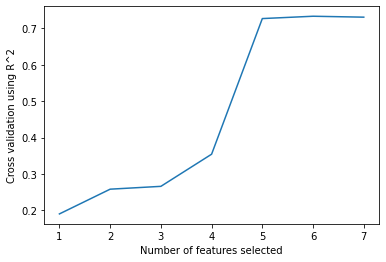

dfheathi
Variable:   Feature Rank:
       X1   1
       X2   1
       X3   1
       X4   1
       X6   2
       X7   1
       X8   1
Optimal number of features for  dfheatlo : 4


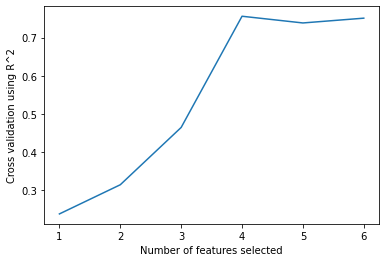

dfheatlo
Variable:   Feature Rank:
       X1   1
       X2   1
       X3   1
       X6   3
       X7   1
       X8   2


In [17]:
# perform feature selection on all four training sets
trainlist = [dfcoolhi, dfcoollo, dfheathi, dfheatlo]
for dftrain in trainlist:
    pickfeat(dftrain)

### scikit-learn.feature_selection.RFECV includes attribute **support_**, a mask for the features list
However, those attributes weren't retained after running pickfeat() on the four dataframes. Instead I will manually define the optimized feature sets for regression and summary. A future iteration of the pickfeat() function will return an optimized list for regression.

In [18]:
# Update the 3 optimized training sets
optcoolhi = dfcoolhi.drop('X8', 1)
optheathi = dfheathi.drop('X6', 1)
optheatlo = dfheatlo.drop(['X6','X8'], 1)

In [20]:
# Read and update the 4 testing sets
dfcoolhitest = pd.read_csv('dfnorm_cool_hi_test.csv')
optcoolhitest = dfcoolhitest.drop('X8', 1)
optcoollotest = pd.read_csv('dfnorm_cool_lo_test.csv')
dfheathitest = pd.read_csv('dfnorm_heat_hi_test.csv')
optheathitest = dfheathitest.drop('X6', 1)
dfheatlotest = pd.read_csv('dfnorm_heat_lo_test.csv')
optheatlotest = dfheatlotest.drop(['X6','X8'], 1)

## Regression and Summary <a name="regressone"></a>
[Return to TOC](#toc)

In [35]:
# def function to perform and evaluate regressions
def regressreport(dfopt, dfopttest):
    datasetname =[x for x in globals() if globals()[x] is dfopt][0] # that funky dataframe name code
    opt_X = dfopt.iloc[:, :-1].values # X & Y lists
    opt_Y = dfopt.iloc[:, -1].values
    opt_Xtest = dfopttest.iloc[:, :-1].values
    opt_Ytest = dfopttest.iloc[:, -1].values
    reg = linear_model.LinearRegression() # create object
    reg.fit(opt_X, opt_Y) # fit to data
    opt_Ypredict = reg.predict(opt_Xtest) # run test data through formula
    print()
    print("======================================")
    print("Linear Regression Report for: ", str(datasetname))
    print("Variable:   Coefficient:")
    print("\n".join("       {}   {}".format(x, y) for x, y in
                    zip(dfopt.iloc[:, :-1].columns.tolist(),reg.coef_)))
    print('Intercept: \n', reg.intercept_)
    print()
    print('Root mean squared error (Standard error): %.3f'
          % mean_squared_error(opt_Ytest, opt_Ypredict, squared=False))
    print('Coefficient of determination (R-squared): %.3f'
          % r2_score(opt_Ytest, opt_Ypredict))
    print('Mean Absolute Error (MAE): %.3f' % mean_absolute_error(opt_Ytest, opt_Ypredict))
    sns.set(style='ticks')
    sns.regplot(opt_Ytest, y=opt_Ypredict, scatter_kws={'alpha':0.2,'color':"orange"})
    plt.title('Actual Y vs Predicted for: '+str(datasetname))
    plt.ylabel('Test Actual')
    plt.xlabel('Test Predicted')
    plt.show()


Linear Regression Report for:  optcoolhi
Variable:   Coefficient:
       X1   16.444380603340353
       X2   7.821601325735818
       X3   6.697382672789237
       X4   8.014296572881381
       X6   0.021866350278284704
       X7   0.15978928014398894
Intercept: 
 -29.621439252438044

Root mean squared error (Standard error): 0.087
Coefficient of determination (R-squared): 0.524
Mean Absolute Error (MAE): 0.071


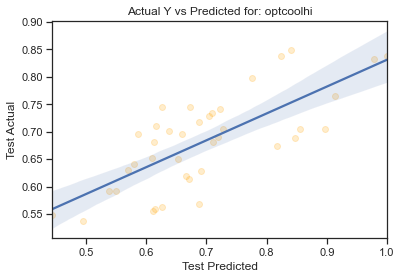


Linear Regression Report for:  dfcoollo
Variable:   Coefficient:
       X1   -2.6237515592091674
       X2   -0.36651230106418725
       X3   -0.711465055006877
       X6   0.007270871644077068
       X7   0.08896536644556785
       X8   -0.0010189978301072917
Intercept: 
 2.951576595342886

Root mean squared error (Standard error): 0.035
Coefficient of determination (R-squared): 0.354
Mean Absolute Error (MAE): 0.029


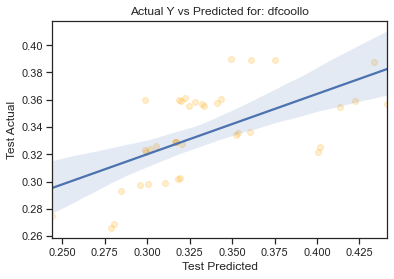


Linear Regression Report for:  optheathi
Variable:   Coefficient:
       X1   23.107747827114654
       X2   10.94180561777699
       X3   9.401810910075405
       X4   11.180488884187291
       X7   0.2436987079125036
       X8   0.035590900607709516
Intercept: 
 -41.78483298143861

Root mean squared error (Standard error): 0.081
Coefficient of determination (R-squared): 0.485
Mean Absolute Error (MAE): 0.067


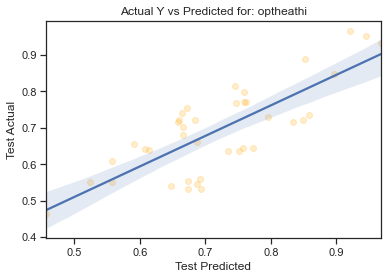


Linear Regression Report for:  optheatlo
Variable:   Coefficient:
       X1   0.28650338660353686
       X2   -118193363474347.12
       X3   60887490274664.04
       X7   0.15453290115123344
Intercept: 
 64469107349643.625

Root mean squared error (Standard error): 0.033
Coefficient of determination (R-squared): 0.544
Mean Absolute Error (MAE): 0.024


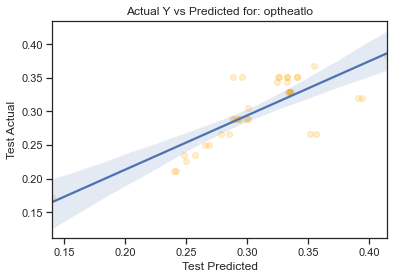

In [34]:
list = [optcoolhi, optcoolhitest,
        dfcoollo, optcoollotest,
        optheathi, optheathitest,
        optheatlo, optheatlotest]

for i in range(0, len(list), 2):
    regressreport(list[i], list[i+1])

# We are not impressed <a name="freshapproach"></a>
## The search for correlation continues.
### Here we will attempt some feature manipulation to elicit a more nuanced relationship between variables
Tasks will include:
* Rename columns with value description
* Consider eliminating X1 (Compactness) variable
* Square X2 (SurfaceArea) variable
* Treat X6 (Orientation) variable as categorical
* Consider raltionship between X2, X3 and X4 (Surface, Wall, and Roof areas)
* Consider relationship between X6 & X7 (Glazing Area and Distribution)

[Return to TOC](#toc)

In [3]:
# Start with original data
df = pd.read_excel('ENB2012_data.xlsx')

In [23]:
df = df.rename(columns={"X1": "Compactness", "X2": "SurfaceArea", "X3": "WallArea", "X4": "RoofArea", 
                   "X5": "Height", "X6": "Orientation", "X7": "GlazingArea", "X8": "GlazingDist"})
df.to_csv('HVAC_label.csv', index=False)

In [25]:
df_lo = df.loc[df['Height'] == 3.5]
df_lo = df_lo.drop('Height', 1)
df_hi = df.loc[df['Height'] == 7]
df_hi = df_hi.drop('Height', 1)

In [26]:
import itertools
xcombos = list(itertools.combinations(['SurfaceArea','WallArea','RoofArea'], 2))
print(xcombos)

[('SurfaceArea', 'WallArea'), ('SurfaceArea', 'RoofArea'), ('WallArea', 'RoofArea')]


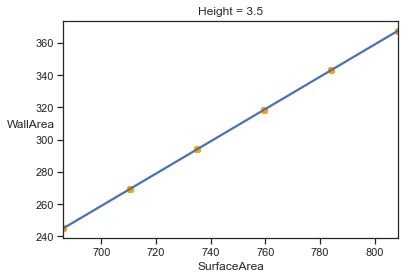

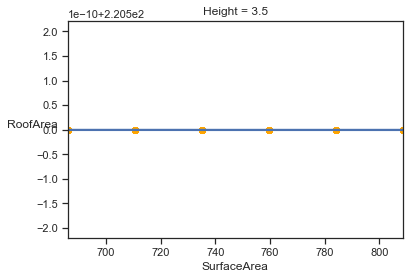

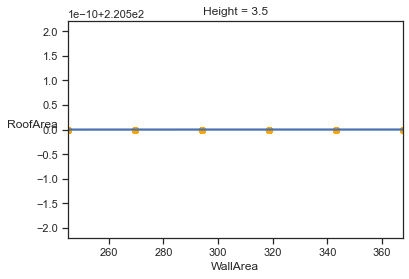

In [27]:
for a,b in xcombos:
    x = df_lo[a]
    y = df_lo[b]
    sns.set(style='ticks')
    sns.regplot(x, y=y, scatter_kws={'alpha':0.2,'color':"orange"})
    plt.ylabel(b, rotation='0')
    plt.xlabel(a)
    plt.title('Height = 3.5')
    plt.show()

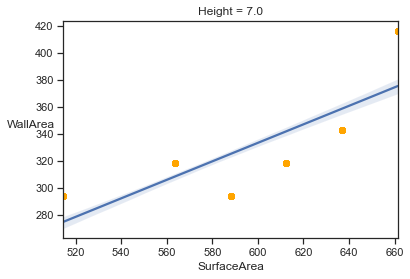

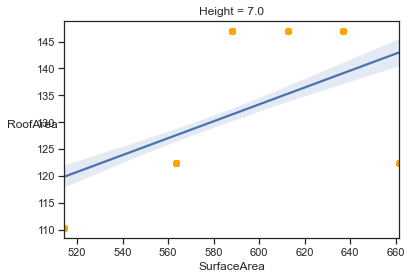

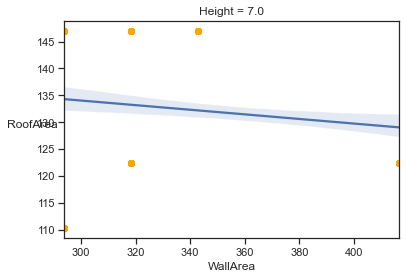

In [28]:
for a,b in xcombos:
    x = df_hi[a]
    y = df_hi[b]
    sns.set(style='ticks')
    sns.regplot(x, y=y, scatter_kws={'alpha':0.2,'color':"orange"})
    plt.ylabel(b, rotation='0')
    plt.xlabel(a)
    plt.title('Height = 7.0')
    plt.show()

In [49]:
# Relation between surface, wall, and roof areas
dfarea = df.loc[df['Height'] == 3.5]
X = df.iloc[:, 2:4].values # X & Y lists
Y = df['SurfaceArea'].values
reg = linear_model.LinearRegression() # create object
reg.fit(X, Y) # fit to data
print("Linear Regression Report for Surface Area as function of Wall & Roof Areas")
print("Height = 3.5")
print("Variable:    Coefficient:")
#print("\n".join("       {}   {}".format(x, y) for x, y in zip([('WallArea','RoofArea')],reg.coef_)))
print("\n".join("{}     {}".format(x, y) for x, y in
                    zip(('WallArea','RoofArea'),reg.coef_)))
print('Intercept:  ', reg.intercept_)

Linear Regression Report for Surface Area as function of Wall & Roof Areas
Height = 3.5
Variable:    Coefficient:
WallArea     0.9999999999999992
RoofArea     1.9999999999999993
Intercept:   3.410605131648481e-13


In [47]:
dfarea = df.loc[df['Height'] == 7.0]
print(dfarea.head())
X = df.iloc[:, 2:4].values # X & Y lists
Y = df['SurfaceArea'].values
reg = linear_model.LinearRegression() # create object
reg.fit(X, Y) # fit to data
print("Linear Regression Report for Surface Area as function of Wall & Roof Areas")
print("Height = 7.0")
print("Variable:    Coefficient:")
#print("\n".join("       {}   {}".format(x, y) for x, y in zip([('WallArea','RoofArea')],reg.coef_)))
print("\n".join("{}     {}".format(x, y) for x, y in
                    zip(('WallArea','RoofArea'),reg.coef_)))
print('Intercept:  ', reg.intercept_)

   Compactness  SurfaceArea  WallArea  RoofArea  Height  Orientation  \
0         0.98        514.5     294.0    110.25     7.0            2   
1         0.98        514.5     294.0    110.25     7.0            3   
2         0.98        514.5     294.0    110.25     7.0            4   
3         0.98        514.5     294.0    110.25     7.0            5   
4         0.90        563.5     318.5    122.50     7.0            2   

   GlazingArea  GlazingDist     Y1     Y2  
0          0.0            0  15.55  21.33  
1          0.0            0  15.55  21.33  
2          0.0            0  15.55  21.33  
3          0.0            0  15.55  21.33  
4          0.0            0  20.84  28.28  
Linear Regression Report for Surface Area as function of Wall & Roof Areas
Height = 7.0
Variable:    Coefficient:
WallArea     0.9999999999999992
RoofArea     1.9999999999999993
Intercept:   3.410605131648481e-13


C:\Users\Robert\anaconda3\envs\desktop-2008\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


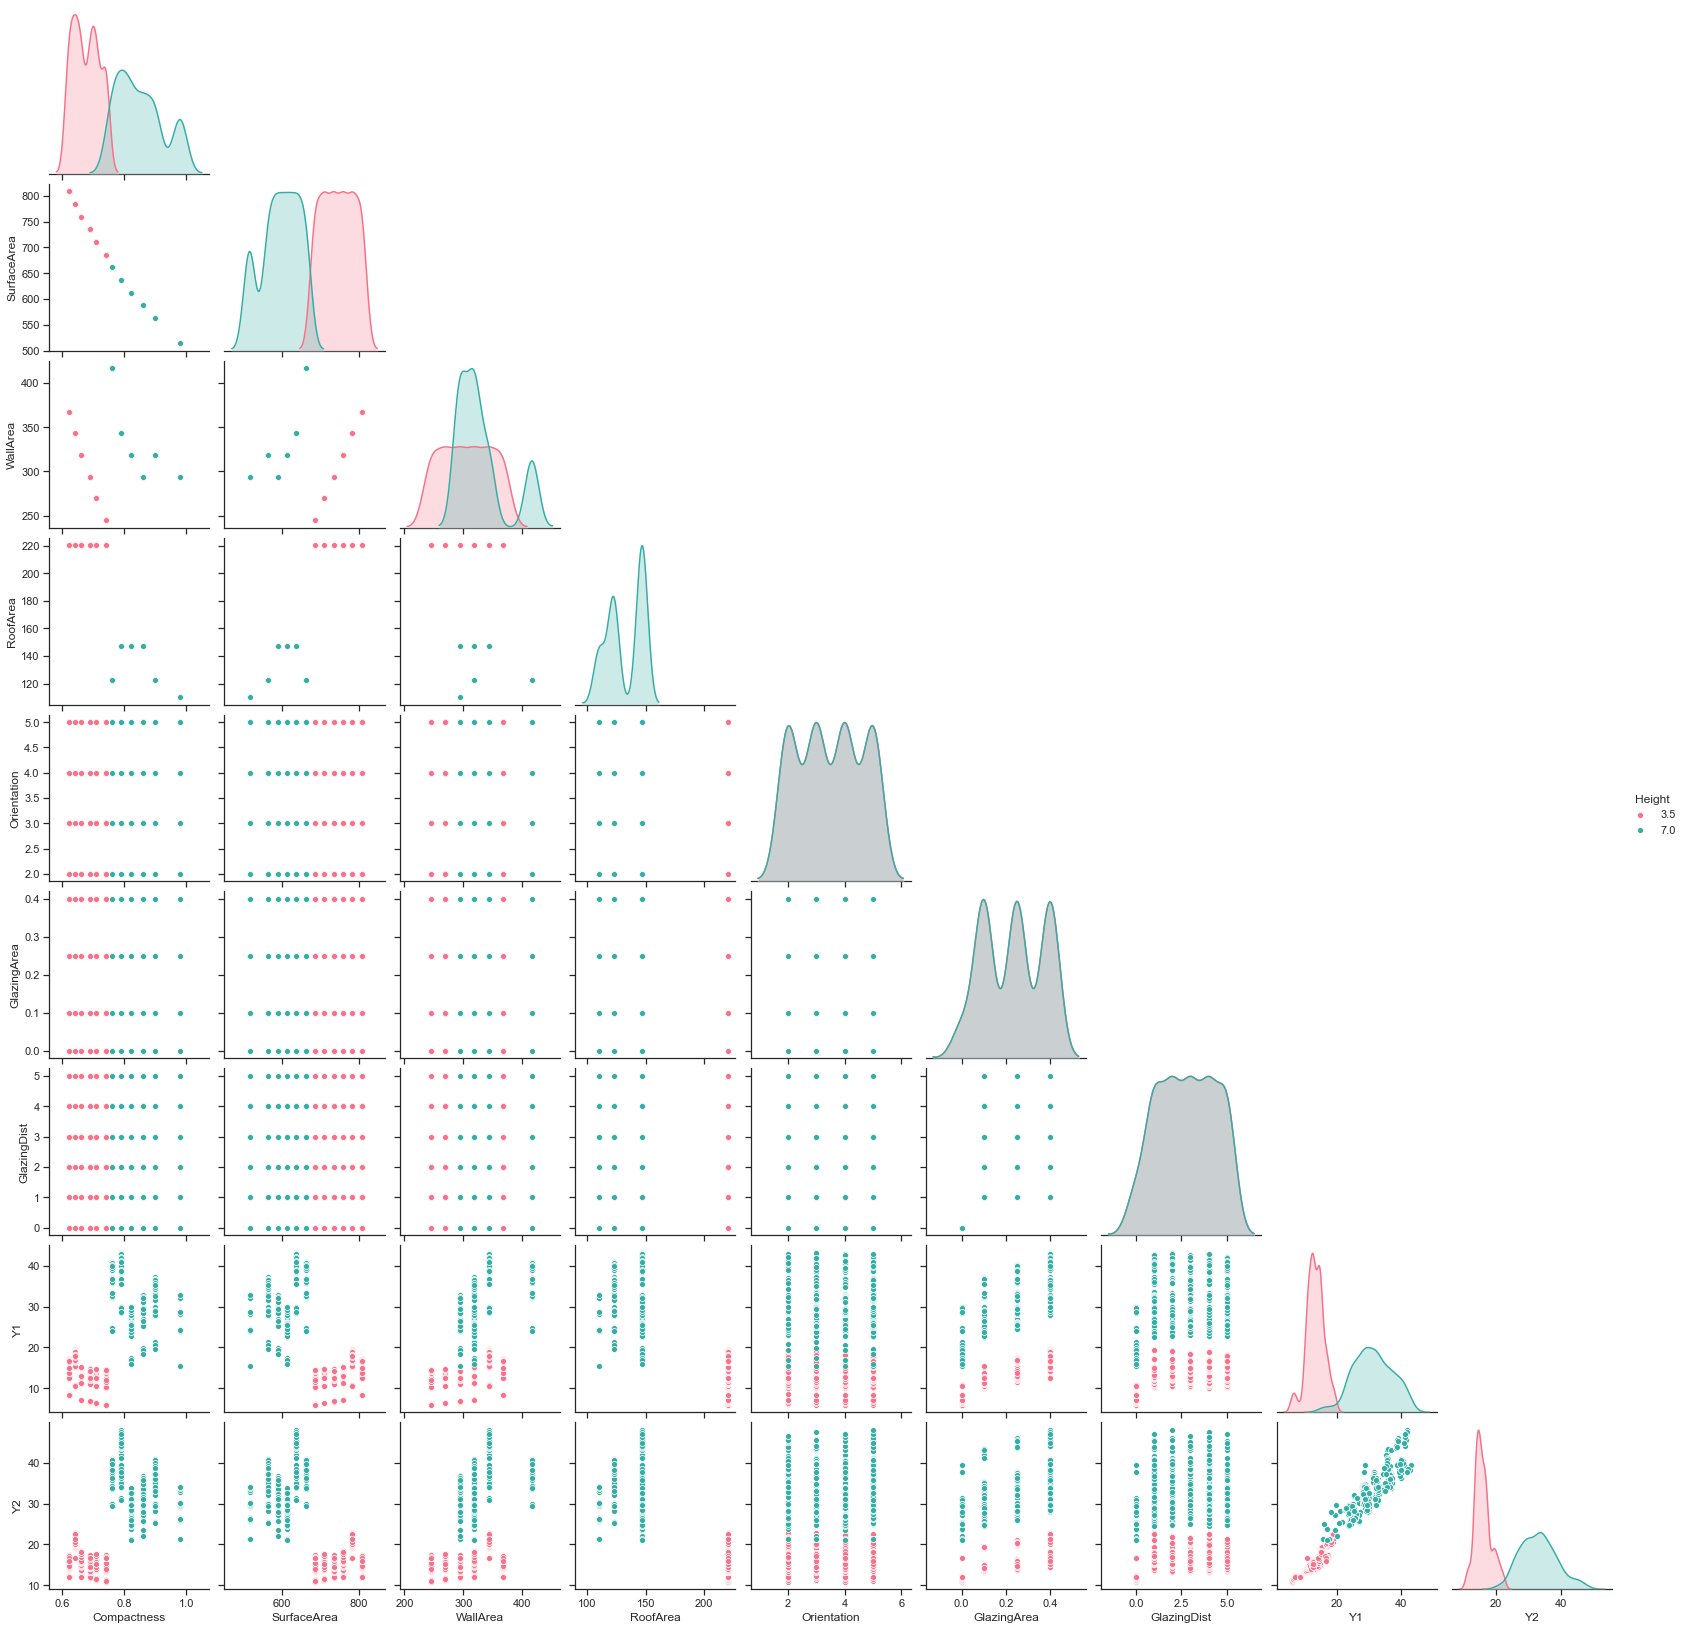

In [48]:
g = sns.pairplot(df, hue="Height", palette="husl", corner=True)

C:\Users\Robert\anaconda3\envs\desktop-2008\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Robert\anaconda3\envs\desktop-2008\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Robert\anaconda3\envs\desktop-2008\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Robert\anaconda3\envs\desktop-2008\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Robert\anaconda3\envs\desktop-2008\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarn

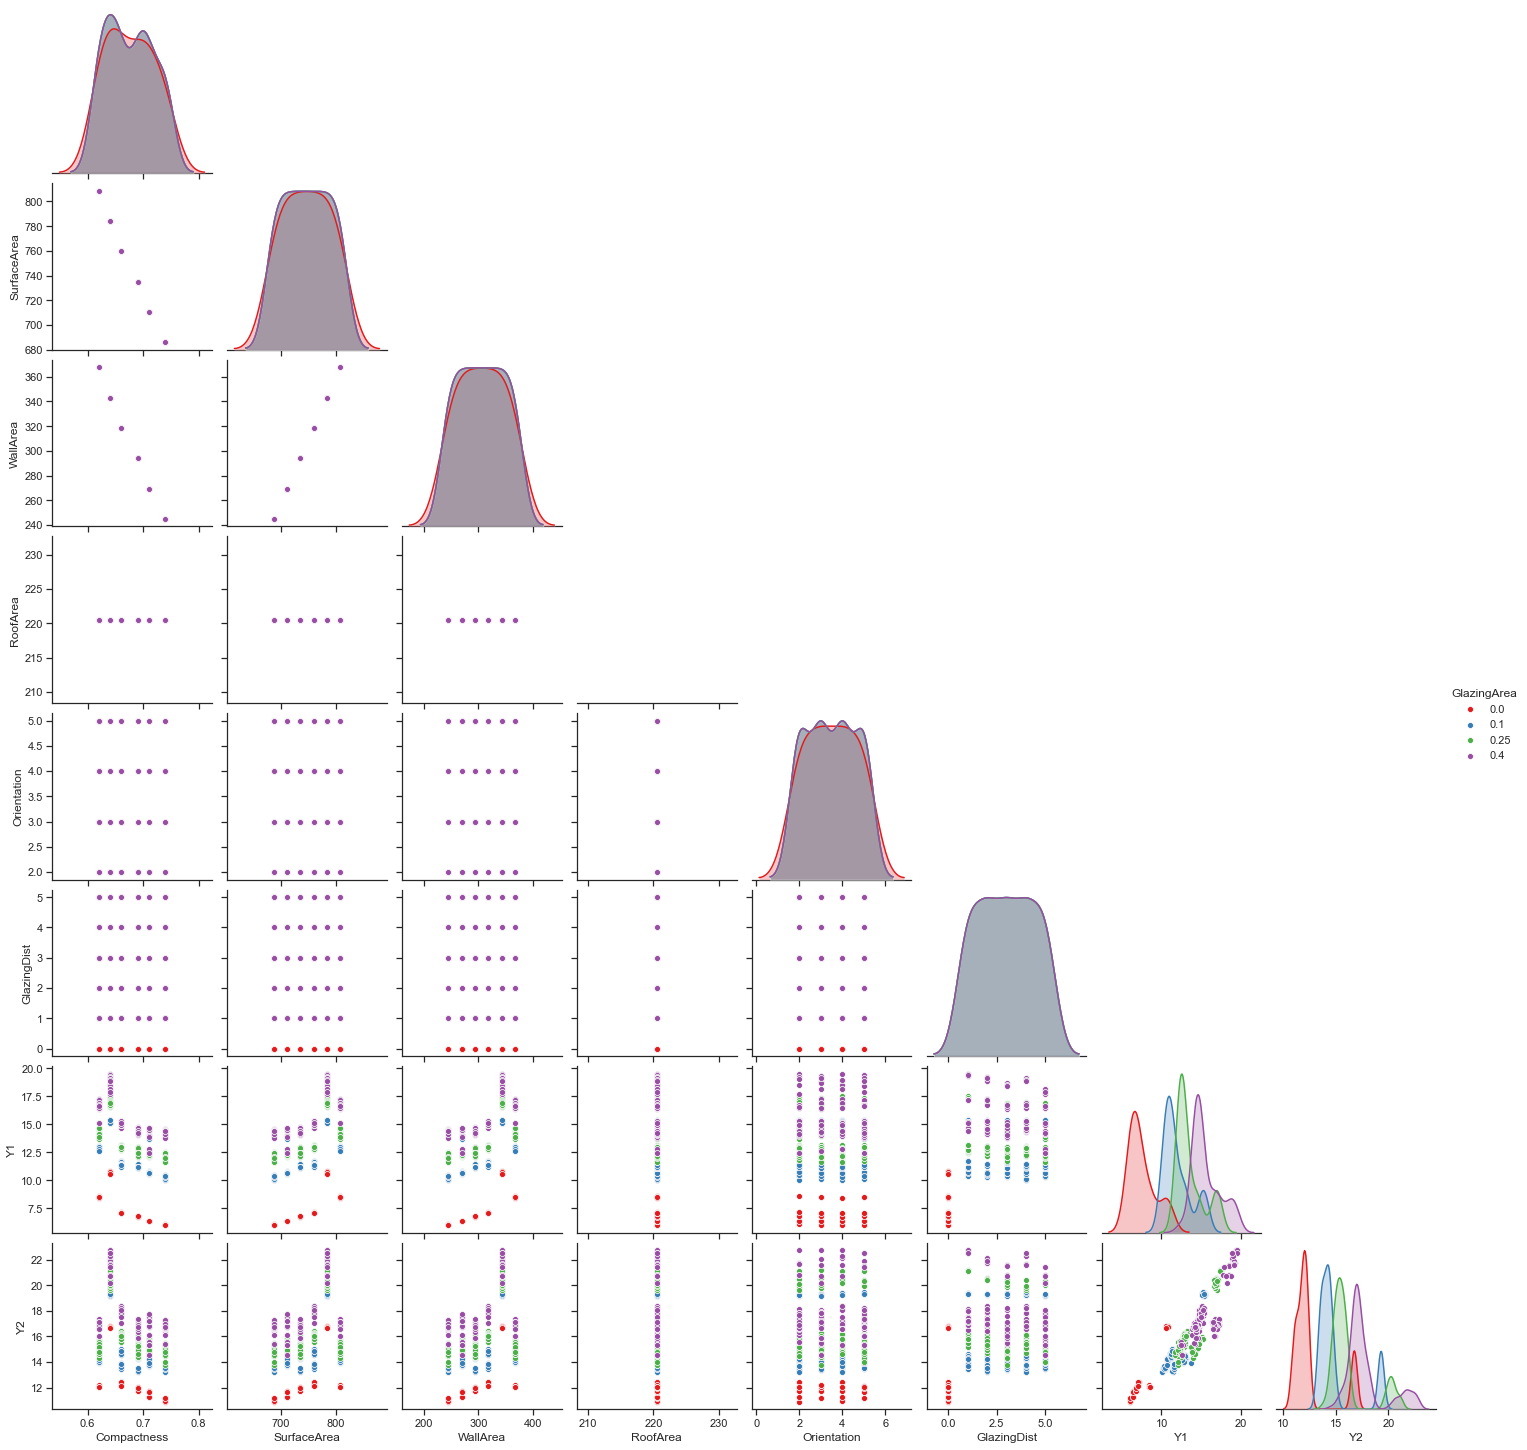

In [64]:
g = sns.pairplot(df_lo, hue="GlazingArea", palette="Set1", corner=True)

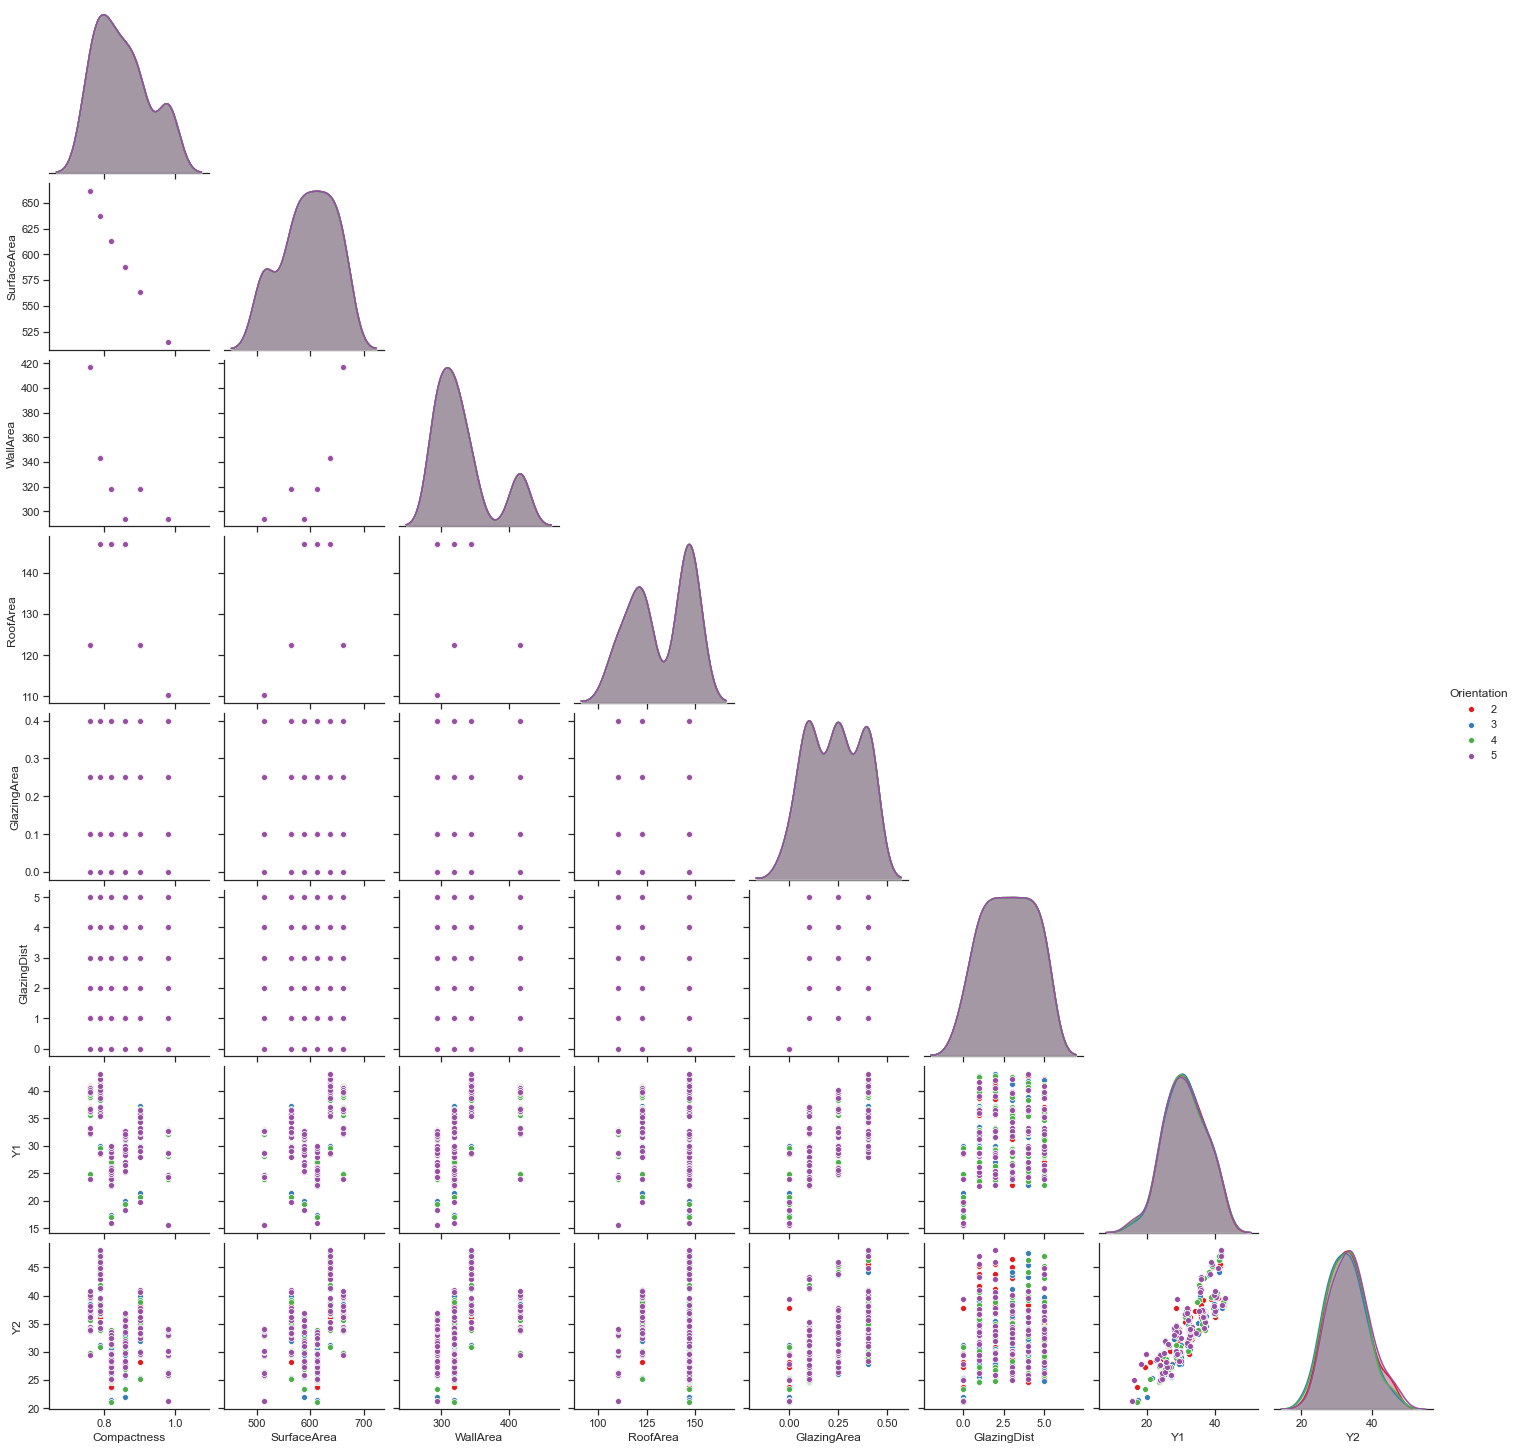

In [68]:
g = sns.pairplot(df_hi, hue="Orientation", palette="Set1", corner=True)

C:\Users\Robert\anaconda3\envs\desktop-2008\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


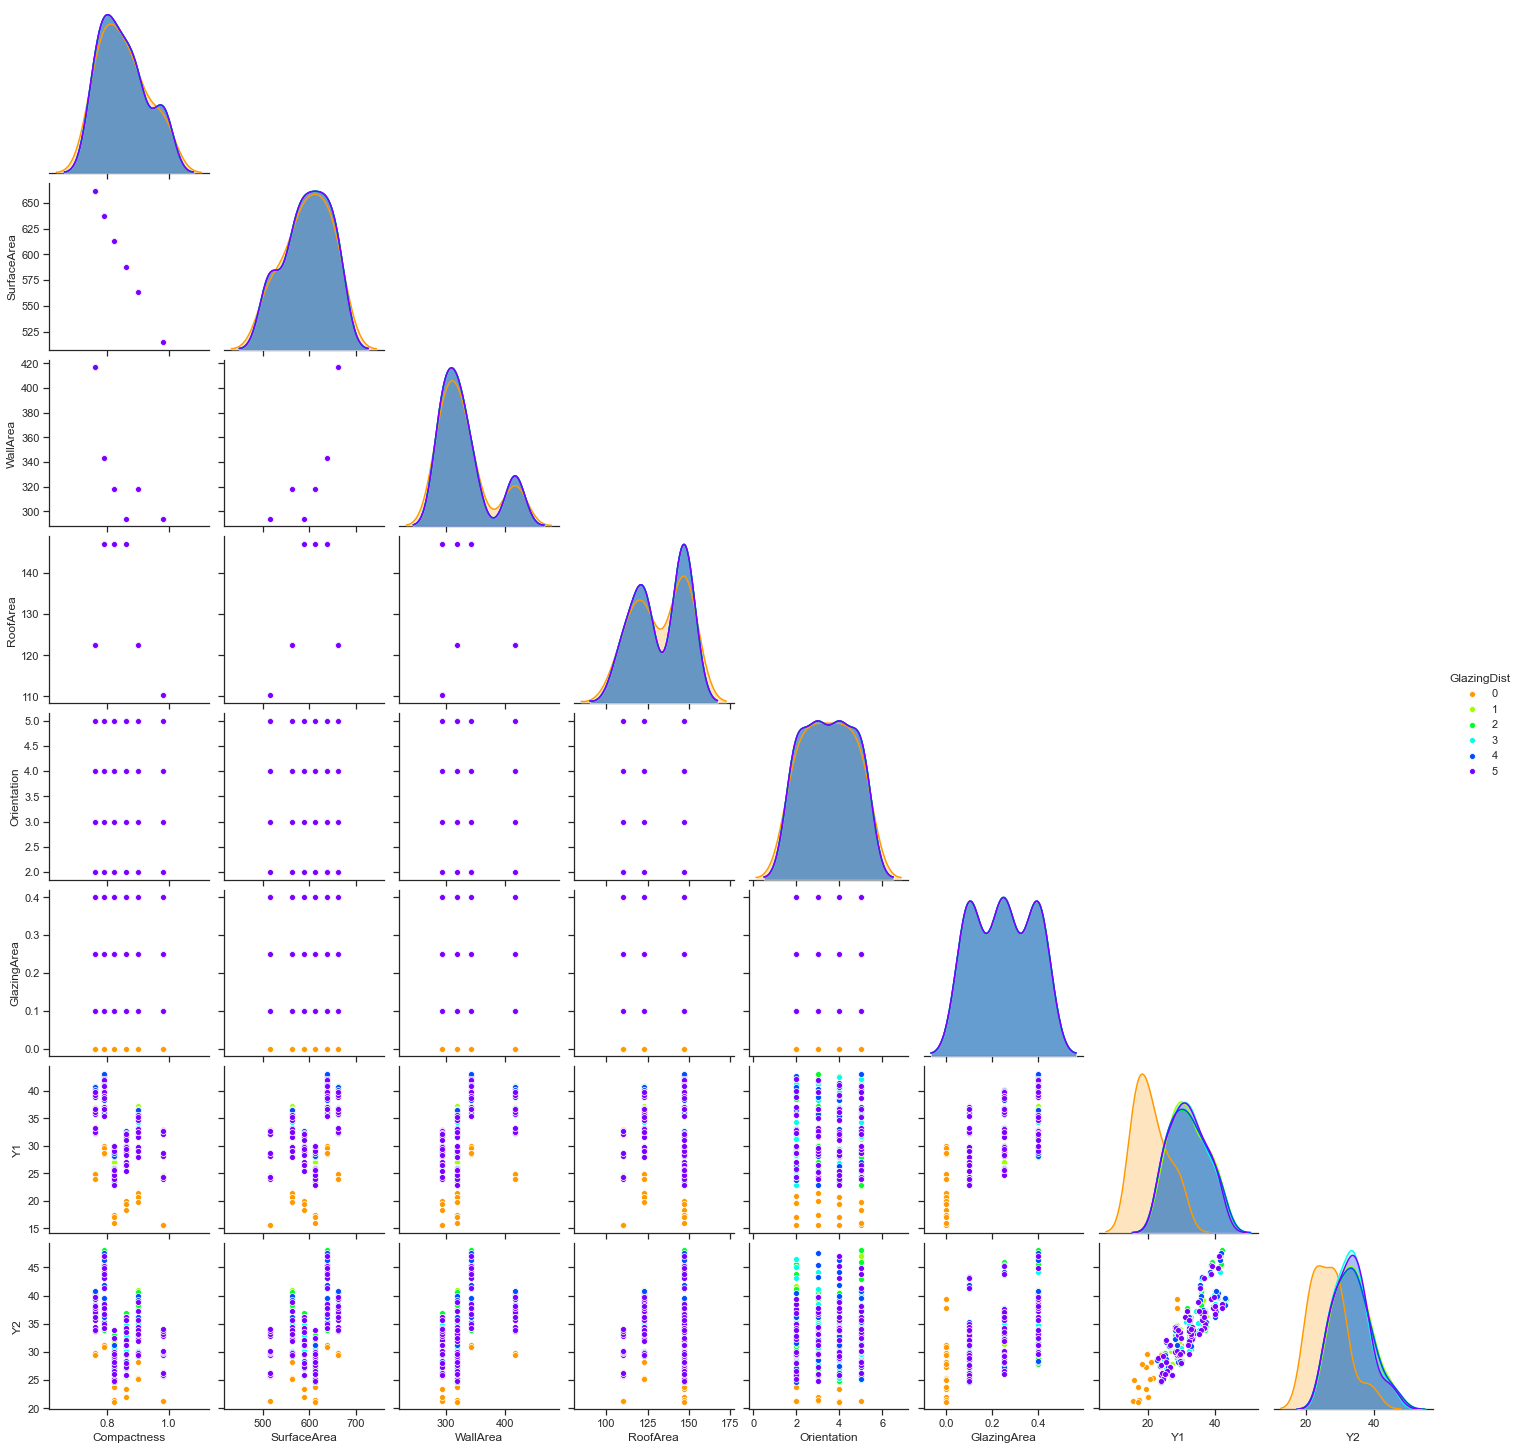

In [74]:
g = sns.pairplot(df_hi, hue="GlazingDist", palette="gist_rainbow", corner=True)

# I did normalization wrong! So we're going to start from the beginning with these steps: <a name="normaltwo"></a>

### 1. Remove Outliers
### 2. Train & Test splits (Including dividing data according to X5: `_hi` (Height=7.0) and `_lo` (Height=3.5))
### 3. Correctly Normalize (X - Xmin)/(Xmax - Xmin)
### 4. RFECV & Regression
### 5. If inadequate results, repeat regression using all variables except these:
- X2 SurfaceArea because it is a simple linear function of WallArea and RoofArea
- X6 Orientation because pivoting of the data suggests that orientation correlates to anything else

### 6. If inadequate results, repeat regression after converting X7 GlazingArea to a one-hot variable
### 7. If inadequate results, repeat regression after converting X8 GlazingDist to a one-hot variable

[Return to TOC](#toc)

In [2]:
# Load realabled dataset
df = pd.read_csv('HVAC_label.csv')
df.shape

(768, 10)

## 1. Remove Outliers

In [18]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(768, 10)

## According to the definition of 150% of IQR, there are no outliers.

## 2. Train & Test splits (Including dividing data according to X5: `_hi` (Height=7.0) and `_lo` (Height=3.5))

In [3]:
# Create separate heating and cooling dataframes
dfheat = df.drop('Y2', 1)
dfheat = dfheat.rename(columns={"Y1": "HeatLoad"})
dfcool = df.drop('Y1', 1)
dfcool = dfcool.rename(columns={"Y2": "CoolLoad"})

In [4]:
# Split by Height
dfheat_lo = dfheat.loc[dfheat['Height'] == 3.5]
dfheat_lo = dfheat_lo.drop('Height', 1)
dfheat_hi = dfheat.loc[dfheat['Height'] == 7]
dfheat_hi = dfheat_hi.drop('Height', 1)
dfcool_lo = dfcool.loc[dfcool['Height'] == 3.5]
dfcool_lo = dfcool_lo.drop('Height', 1)
dfcool_hi = dfcool.loc[dfcool['Height'] == 7]
dfcool_hi = dfcool_hi.drop('Height', 1)

In [7]:
# Using previously defined function, split & save all 4 sets into 90/10 train/test
list = [dfheat_lo, dfheat_hi, dfcool_lo, dfcool_hi]
for dataset in list:
    splitnsave(dataset)

## 3. Correctly Normalize (X - Xmin)/(Xmax - Xmin)

In [8]:
# Read in the 8 train & test sets (the above step did not put them in memory)
dfheat_lo_train = pd.read_csv('dfheat_lo_train.csv')
dfheat_lo_test = pd.read_csv('dfheat_lo_test.csv')
dfheat_hi_train = pd.read_csv('dfheat_hi_train.csv')
dfheat_hi_test = pd.read_csv('dfheat_hi_test.csv')
dfcool_lo_train = pd.read_csv('dfcool_lo_train.csv')
dfcool_lo_test = pd.read_csv('dfcool_lo_test.csv')
dfcool_hi_train = pd.read_csv('dfcool_hi_train.csv')
dfcool_hi_test = pd.read_csv('dfcool_hi_test.csv')

In [26]:
# Set of commands to normalize both test & train according to train, then save the new dfs
# perform a robust scaler transform of the dataset
scaler = MinMaxScaler()
traindata = scaler.fit_transform(dfheat_lo_train)
# apply the same normalization to the test data
testdata = scaler.transform(dfheat_lo_test)
# convert the arrays back to a dataframe, so that they work with my other functions, save .csv files for replication
normheat_lo_train = pd.DataFrame(data=traindata, columns=dfheat_lo_train.columns)
normheat_lo_train.to_csv('normheat_lo_train.csv', index=False)
normheat_lo_test = pd.DataFrame(data=testdata, columns=dfheat_lo_test.columns)
normheat_lo_test.to_csv('normheat_lo_test.csv', index=False)
normheat_lo_train.info()
normheat_lo_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Compactness  345 non-null    float64
 1   SurfaceArea  345 non-null    float64
 2   WallArea     345 non-null    float64
 3   RoofArea     345 non-null    float64
 4   Orientation  345 non-null    float64
 5   GlazingArea  345 non-null    float64
 6   GlazingDist  345 non-null    float64
 7   HeatLoad     345 non-null    float64
dtypes: float64(8)
memory usage: 21.7 KB


,Compactness,SurfaceArea,WallArea,RoofArea,Orientation,GlazingArea,GlazingDist,HeatLoad
count,345.000000,345.000000,345.000000,345.0,345.000000,345.000000,345.000000,345.000000
mean,0.471256,0.500870,0.500870,0.0,0.510145,0.580072,0.563478,0.539842
std,0.345173,0.344094,0.344094,0.0,0.372648,0.334640,0.310569,0.201580
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.166667,0.200000,0.200000,0.0,0.333333,0.250000,0.400000,0.405625
50%,0.333333,0.600000,0.600000,0.0,0.666667,0.625000,0.600000,0.515174
75%,0.750000,0.800000,0.800000,0.0,1.000000,1.000000,0.800000,0.672095
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [27]:
scaler = MinMaxScaler()
traindata = scaler.fit_transform(dfheat_hi_train)
testdata = scaler.transform(dfheat_hi_test)
normheat_hi_train = pd.DataFrame(data=traindata, columns=dfheat_hi_train.columns)
normheat_hi_train.to_csv('normheat_hi_train.csv', index=False)
normheat_hi_test = pd.DataFrame(data=testdata, columns=dfheat_hi_test.columns)
normheat_hi_test.to_csv('normheat_hi_test.csv', index=False)
normheat_hi_train.info()
normheat_hi_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Compactness  345 non-null    float64
 1   SurfaceArea  345 non-null    float64
 2   WallArea     345 non-null    float64
 3   RoofArea     345 non-null    float64
 4   Orientation  345 non-null    float64
 5   GlazingArea  345 non-null    float64
 6   GlazingDist  345 non-null    float64
 7   HeatLoad     345 non-null    float64
dtypes: float64(8)
memory usage: 21.7 KB


,Compactness,SurfaceArea,WallArea,RoofArea,Orientation,GlazingArea,GlazingDist,HeatLoad
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,0.419236,0.552657,0.293913,0.615459,0.514976,0.587681,0.564058,0.572481
std,0.329421,0.325559,0.334443,0.403817,0.368123,0.337398,0.311571,0.218845
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.136364,0.333333,0.000000,0.333333,0.333333,0.250000,0.200000,0.416697
50%,0.454545,0.500000,0.200000,1.000000,0.666667,0.625000,0.600000,0.590200
75%,0.636364,0.833333,0.400000,1.000000,1.000000,1.000000,0.800000,0.744465
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
scaler = MinMaxScaler()
traindata = scaler.fit_transform(dfcool_hi_train)
testdata = scaler.transform(dfcool_hi_test)
normcool_hi_train = pd.DataFrame(data=traindata, columns=dfcool_hi_train.columns)
normcool_hi_train.to_csv('normcool_hi_train.csv', index=False)
normcool_hi_test = pd.DataFrame(data=testdata, columns=dfcool_hi_test.columns)
normcool_hi_test.to_csv('normcool_hi_test.csv', index=False)
normcool_hi_train.info()
normcool_hi_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Compactness  345 non-null    float64
 1   SurfaceArea  345 non-null    float64
 2   WallArea     345 non-null    float64
 3   RoofArea     345 non-null    float64
 4   Orientation  345 non-null    float64
 5   GlazingArea  345 non-null    float64
 6   GlazingDist  345 non-null    float64
 7   CoolLoad     345 non-null    float64
dtypes: float64(8)
memory usage: 21.7 KB


,Compactness,SurfaceArea,WallArea,RoofArea,Orientation,GlazingArea,GlazingDist,CoolLoad
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,0.414493,0.558454,0.307246,0.604831,0.496618,0.591304,0.561159,0.446408
std,0.337048,0.333644,0.349717,0.405919,0.371903,0.331948,0.309912,0.204852
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.136364,0.333333,0.000000,0.333333,0.333333,0.250000,0.400000,0.307778
50%,0.272727,0.666667,0.200000,0.333333,0.333333,0.625000,0.600000,0.449572
75%,0.636364,0.833333,0.400000,1.000000,0.666667,1.000000,0.800000,0.583923
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
scaler = MinMaxScaler()
traindata = scaler.fit_transform(dfcool_lo_train)
testdata = scaler.transform(dfcool_lo_test)
normcool_lo_train = pd.DataFrame(data=traindata, columns=dfcool_lo_train.columns)
normcool_lo_train.to_csv('normcool_lo_train.csv', index=False)
normcool_lo_test = pd.DataFrame(data=testdata, columns=dfcool_lo_test.columns)
normcool_lo_test.to_csv('normcool_lo_test.csv', index=False)
normcool_lo_train.info()
normcool_lo_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Compactness  345 non-null    float64
 1   SurfaceArea  345 non-null    float64
 2   WallArea     345 non-null    float64
 3   RoofArea     345 non-null    float64
 4   Orientation  345 non-null    float64
 5   GlazingArea  345 non-null    float64
 6   GlazingDist  345 non-null    float64
 7   CoolLoad     345 non-null    float64
dtypes: float64(8)
memory usage: 21.7 KB


,Compactness,SurfaceArea,WallArea,RoofArea,Orientation,GlazingArea,GlazingDist,CoolLoad
count,345.000000,345.000000,345.000000,345.0,345.000000,345.000000,345.000000,345.000000
mean,0.475121,0.496812,0.496812,0.0,0.487923,0.586594,0.555942,0.438556
std,0.339045,0.337598,0.337598,0.0,0.374320,0.336669,0.311646,0.205330
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.166667,0.200000,0.200000,0.0,0.000000,0.250000,0.200000,0.295013
50%,0.583333,0.400000,0.400000,0.0,0.333333,0.625000,0.600000,0.402367
75%,0.750000,0.800000,0.800000,0.0,0.666667,1.000000,0.800000,0.533390
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


## 4. RFECV & Regression

Optimal number of features for  normcool_hi_train : 5


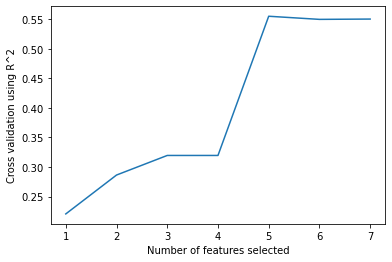

normcool_hi_train
Variable:   Feature Rank:
       Compactness   1
       SurfaceArea   1
       WallArea   1
       RoofArea   1
       Orientation   2
       GlazingArea   1
       GlazingDist   3
Optimal number of features for  normcool_lo_train : 4


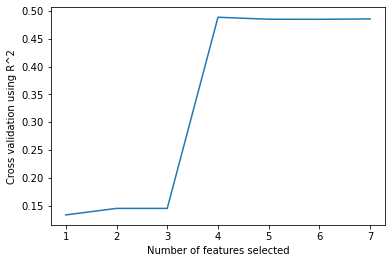

normcool_lo_train
Variable:   Feature Rank:
       Compactness   1
       SurfaceArea   1
       WallArea   1
       RoofArea   4
       Orientation   2
       GlazingArea   1
       GlazingDist   3
Optimal number of features for  normheat_hi_train : 5


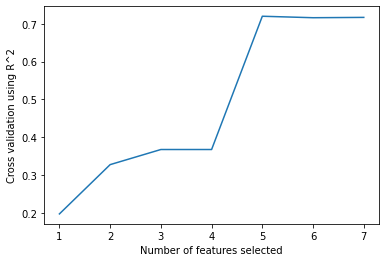

normheat_hi_train
Variable:   Feature Rank:
       Compactness   1
       SurfaceArea   1
       WallArea   1
       RoofArea   1
       Orientation   3
       GlazingArea   1
       GlazingDist   2
Optimal number of features for  normheat_lo_train : 5


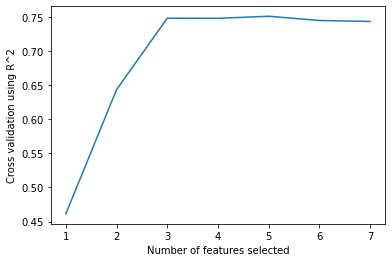

normheat_lo_train
Variable:   Feature Rank:
       Compactness   1
       SurfaceArea   1
       WallArea   1
       RoofArea   3
       Orientation   2
       GlazingArea   1
       GlazingDist   1


In [31]:
# Run the properly normalized training sets through feature analysis (don't forget to redifine pickfeat!)
trainlist = [normcool_hi_train, normcool_lo_train, normheat_hi_train, normheat_lo_train]
for dftrain in trainlist:
    pickfeat(dftrain)

In [32]:
# Update the training and testing dfs
normheat_lo_train = normheat_lo_train.drop(['RoofArea','Orientation'], 1)
normheat_lo_test = normheat_lo_test.drop(['RoofArea','Orientation'], 1)
normheat_hi_train = normheat_hi_train.drop(['Orientation','GlazingDist'], 1)
normheat_hi_test = normheat_hi_test.drop(['Orientation','GlazingDist'], 1)
normcool_lo_train = normcool_lo_train.drop(['RoofArea','Orientation','GlazingDist'], 1)
normcool_lo_test = normcool_lo_test.drop(['RoofArea','Orientation','GlazingDist'], 1)
normcool_hi_train = normcool_hi_train.drop(['Orientation','GlazingDist'], 1)
normcool_hi_test = normcool_hi_test.drop(['Orientation','GlazingDist'], 1)


Linear Regression Report for:  normcool_hi_train
Variable:   Coefficient:
       Compactness   6.69374730870948
       SurfaceArea   3.409570303101617
       WallArea   2.8849015243032965
       RoofArea   2.01097139903107
       GlazingArea   0.2909269975209678
Intercept: 
 -6.506889812093693

Root mean squared error (Standard error): 0.140
Coefficient of determination (R-squared): 0.467
Mean Absolute Error (MAE): 0.105


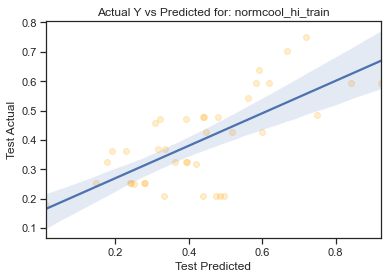


Linear Regression Report for:  normcool_lo_train
Variable:   Coefficient:
       Compactness   -1.25525162442418
       SurfaceArea   3009997429476.894
       WallArea   -3009997429477.921
       GlazingArea   0.35924524674291697
Intercept: 
 1.335528526243997

Root mean squared error (Standard error): 0.145
Coefficient of determination (R-squared): 0.464
Mean Absolute Error (MAE): 0.116


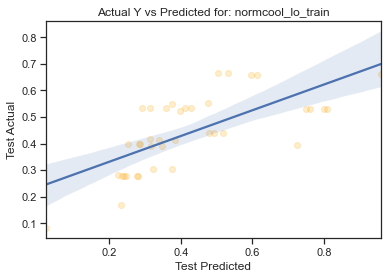


Linear Regression Report for:  normheat_hi_train
Variable:   Coefficient:
       Compactness   7.0094589250482064
       SurfaceArea   29830009474710.14
       WallArea   -24858341228919.1
       RoofArea   -14915004737351.217
       GlazingArea   0.3882844835292095
Intercept: 
 -6.734159497142876

Root mean squared error (Standard error): 0.088
Coefficient of determination (R-squared): 0.785
Mean Absolute Error (MAE): 0.076


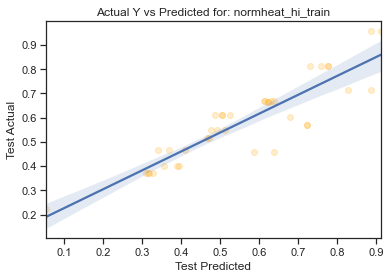


Linear Regression Report for:  normheat_lo_train
Variable:   Coefficient:
       Compactness   0.16013824368648888
       SurfaceArea   0.2195497241076259
       WallArea   0.21954972410762305
       GlazingArea   0.4295931912367898
       GlazingDist   0.0423429505400135
Intercept: 
 -0.028610299330721567

Root mean squared error (Standard error): 0.083
Coefficient of determination (R-squared): 0.725
Mean Absolute Error (MAE): 0.063


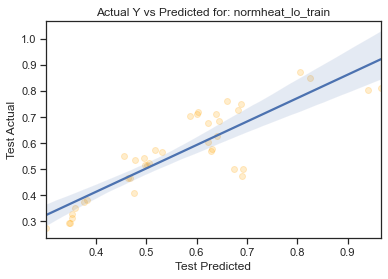

In [36]:
# Regression using previously defined function (don't forget to redefine!)
list = [normcool_hi_train, normcool_hi_test,
        normcool_lo_train, normcool_lo_test,
        normheat_hi_train, normheat_hi_test,
        normheat_lo_train, normheat_lo_test]

for i in range(0, len(list), 2):
    regressreport(list[i], list[i+1])

## 5. If inadequate results, repeat regression using all variables except these:
- X2 SurfaceArea because it is a simple linear function of WallArea and RoofArea
- X6 Orientation because pivoting of the data suggests that orientation correlates to anything else

### Results for the Heat sets are acceptable
### Orientation was already removed by the RFECV, here we remove SurfaceArea and rerun regressions

In [41]:
# Reload the original Cool test & train sets to regain RoofArea column
normcool_lo_train = pd.read_csv('normcool_lo_train.csv').drop(['SurfaceArea','RoofArea','Orientation','GlazingDist'], 1)
normcool_lo_test = pd.read_csv('normcool_lo_test.csv').drop(['SurfaceArea','RoofArea','Orientation','GlazingDist'], 1)
normcool_hi_train = pd.read_csv('normcool_hi_train.csv').drop(['SurfaceArea','Orientation','GlazingDist'], 1)
normcool_hi_test = pd.read_csv('normcool_hi_test.csv').drop(['SurfaceArea','Orientation','GlazingDist'], 1)


Linear Regression Report for:  normcool_hi_train
Variable:   Coefficient:
       Compactness   6.693747308709474
       WallArea   5.726210110221305
       RoofArea   3.7157565505818773
       GlazingArea   0.29092699752096896
Intercept: 
 -6.506889812093688

Root mean squared error (Standard error): 0.140
Coefficient of determination (R-squared): 0.467
Mean Absolute Error (MAE): 0.105


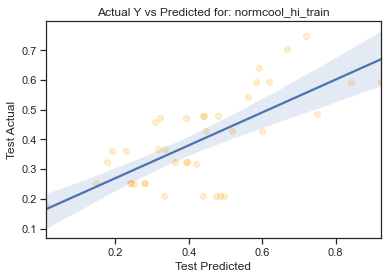


Linear Regression Report for:  normcool_lo_train
Variable:   Coefficient:
       Compactness   -1.2552516244241803
       WallArea   -1.0264600804145174
       GlazingArea   0.35600589558289325
Intercept: 
 1.3360782664229554

Root mean squared error (Standard error): 0.145
Coefficient of determination (R-squared): 0.463
Mean Absolute Error (MAE): 0.116


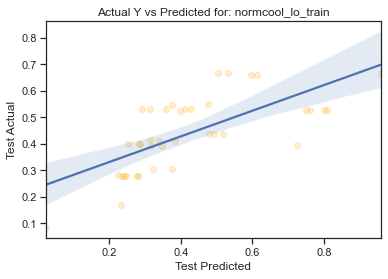

In [42]:
# Regression using previously defined function
list = [normcool_hi_train, normcool_hi_test,
        normcool_lo_train, normcool_lo_test]

for i in range(0, len(list), 2):
    regressreport(list[i], list[i+1])

### This resulted in slightly worse R-squared for the Cool_lo dataset

## 6. If inadequate results, repeat regression after converting X7 GlazingArea to a one-hot variable
Again, only working on Cool datasets since Hots are okiedokie\
Also gonna restore SurfaceArea to Cool datasets

In [43]:
# Reload the original Cool test & train sets and select features
normcool_lo_train = pd.read_csv('normcool_lo_train.csv').drop(['RoofArea','Orientation','GlazingDist'], 1)
normcool_lo_test = pd.read_csv('normcool_lo_test.csv').drop(['RoofArea','Orientation','GlazingDist'], 1)
normcool_hi_train = pd.read_csv('normcool_hi_train.csv').drop(['Orientation','GlazingDist'], 1)
normcool_hi_test = pd.read_csv('normcool_hi_test.csv').drop(['Orientation','GlazingDist'], 1)

In [44]:
# Use Pandas dummy encoding to preserve dfs for functions
dummycool_lo_train = pd.get_dummies(normcool_lo_train, prefix=['GA'], columns=['GlazingArea'])
dummycool_lo_test = pd.get_dummies(normcool_lo_test, prefix=['GA'], columns=['GlazingArea'])
dummycool_hi_train = pd.get_dummies(normcool_hi_train, prefix=['GA'], columns=['GlazingArea'])
dummycool_hi_test = pd.get_dummies(normcool_hi_test, prefix=['GA'], columns=['GlazingArea'])

In [48]:
# Move CoolLoad to last column for regression reporting function
locols = ['Compactness', 'SurfaceArea', 'WallArea', 'GA_0.0', 'GA_0.25', 'GA_0.625', 'GA_1.0', 'CoolLoad']
dummycool_lo_train = dummycool_lo_train[locols]
dummycool_lo_test = dummycool_lo_test[locols]
hicols = ['Compactness', 'SurfaceArea', 'RoofArea', 'WallArea', 'GA_0.0', 'GA_0.25', 'GA_0.625', 'GA_1.0', 'CoolLoad']
dummycool_hi_train = dummycool_hi_train[hicols]
dummycool_hi_test = dummycool_hi_test[hicols]


Linear Regression Report for:  dummycool_hi_train
Variable:   Coefficient:
       Compactness   6.690374375882118
       SurfaceArea   3.407703100557614
       RoofArea   2.0102390907885317
       WallArea   2.883100266196019
       GA_0.0   -0.1790212067090072
       GA_0.25   -0.043400338463255805
       GA_0.625   0.06511946386574148
       GA_1.0   0.1573020813065213
Intercept: 
 -6.377781582383728

Root mean squared error (Standard error): 0.135
Coefficient of determination (R-squared): 0.505
Mean Absolute Error (MAE): 0.102


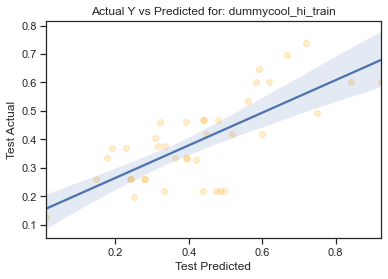


Linear Regression Report for:  dummycool_lo_train
Variable:   Coefficient:
       Compactness   -1.2796877676174196
       SurfaceArea   -0.5250764657339342
       WallArea   -0.5250764657339344
       GA_0.0   -0.2379828699400637
       GA_0.25   -0.03231593645915909
       GA_0.625   0.0672238303779439
       GA_1.0   0.203074976021279
Intercept: 
 1.5089704420324748

Root mean squared error (Standard error): 0.147
Coefficient of determination (R-squared): 0.449
Mean Absolute Error (MAE): 0.122


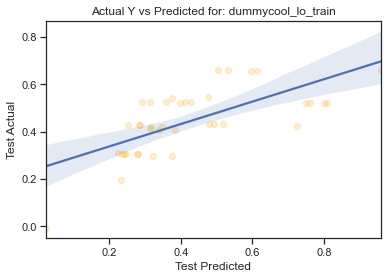

In [50]:
# Regression using previously defined function
list = [dummycool_hi_train, dummycool_hi_test,
        dummycool_lo_train, dummycool_lo_test]

for i in range(0, len(list), 2):
    regressreport(list[i], list[i+1])

### Drop one of the one-hot variables as is sometimes recommended

In [52]:
# Drop GA_0.25 from Cool sets
dummycool_lo_train = dummycool_lo_train.drop('GA_0.25', axis=1)
dummycool_lo_test = dummycool_lo_test.drop('GA_0.25', axis=1)
dummycool_hi_train = dummycool_hi_train.drop('GA_0.25', axis=1)
dummycool_hi_test = dummycool_hi_test.drop('GA_0.25', axis=1)


Linear Regression Report for:  dummycool_hi_train
Variable:   Coefficient:
       Compactness   6.690374375882125
       SurfaceArea   3.4077031005576535
       RoofArea   2.010239090788512
       WallArea   2.883100266195989
       GA_0.0   -0.13562086824574326
       GA_0.625   0.1085198023290012
       GA_1.0   0.2007024197697812
Intercept: 
 -6.4211819208469905

Root mean squared error (Standard error): 0.135
Coefficient of determination (R-squared): 0.505
Mean Absolute Error (MAE): 0.102


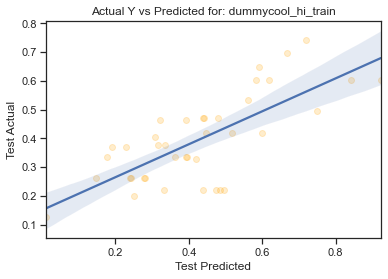


Linear Regression Report for:  dummycool_lo_train
Variable:   Coefficient:
       Compactness   -1.2796877676174203
       SurfaceArea   -0.5250764657339345
       WallArea   -0.525076465733935
       GA_0.0   -0.20566693348090503
       GA_0.625   0.09953976683710328
       GA_1.0   0.23539091248043786
Intercept: 
 1.4766545055733165

Root mean squared error (Standard error): 0.147
Coefficient of determination (R-squared): 0.449
Mean Absolute Error (MAE): 0.122


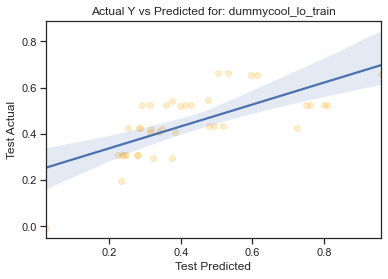

In [53]:
# Regression using previously defined function
list = [dummycool_hi_train, dummycool_hi_test,
        dummycool_lo_train, dummycool_lo_test]

for i in range(0, len(list), 2):
    regressreport(list[i], list[i+1])

## Made no difference.

## 7. One-hot encode GlazingDist
### Actually, at the time this task was proposed, I didn't know GlazingDist was going to be removed earlier on by the RFECV process.
As a result this task has diminished in potential model improvement and will not be performed.

## Insights <a name="insights"></a>
[Return to TOC](#toc)

### Introduction
This dataset was developed using Autodesk Ecotect software, a CAD tool able to perform sophisticated HVAC load analysis on structures [1]. This $1,100-per-license (in 2011 [2]) program was used to calculate reference loads for an assortment of typical residential home shapes, with the goal of approximating the calculated loads from a suite of relevant home features. If successful, the otherwise expensive but necessary HVAC analysis could be substituted with this regression model.

### What's Inside
Eight residential home features were collected, as well as the calculated loads for heating and cooling.
1. Compactness - Relative compactness, a function of total exterior area divided by heated volume
2. SurfaceArea - Surface area
3. WallArea - Wall area
4. RoofArea - Roof area
5. Height - Height of building
6. Orientation - Direction building faces
7. GlazingArea - Ratio of windows to wall area
8. GlazingDist - Glazing distribution  
HeatLoad - Calculated heating load for structure  
CoolLoad - Calculated cooling load for structure

### Cleaning
Good news! The data is distributed in pristine condition: all fields have appropriate values of the appropriate type.

### Outliers
Using the definition of 150\% of IQR, the dataset contains no outliers.


[1] https://www.sciencedirect.com/science/article/abs/pii/S037877881200151X/  
[2] http://huvylrvndkjukbqk.depotapps.com/product/autodesk-ecotect-analysis-2011/

## EDA

Strip and vilolin plots reveal the lack of normality in most variables.

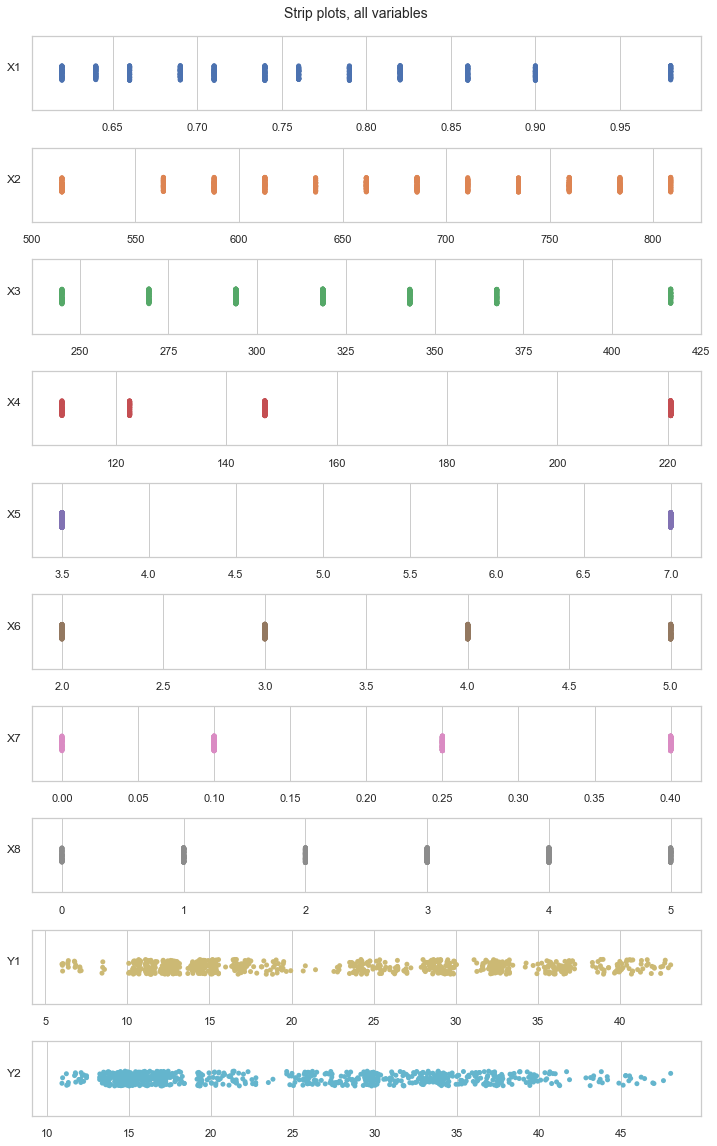

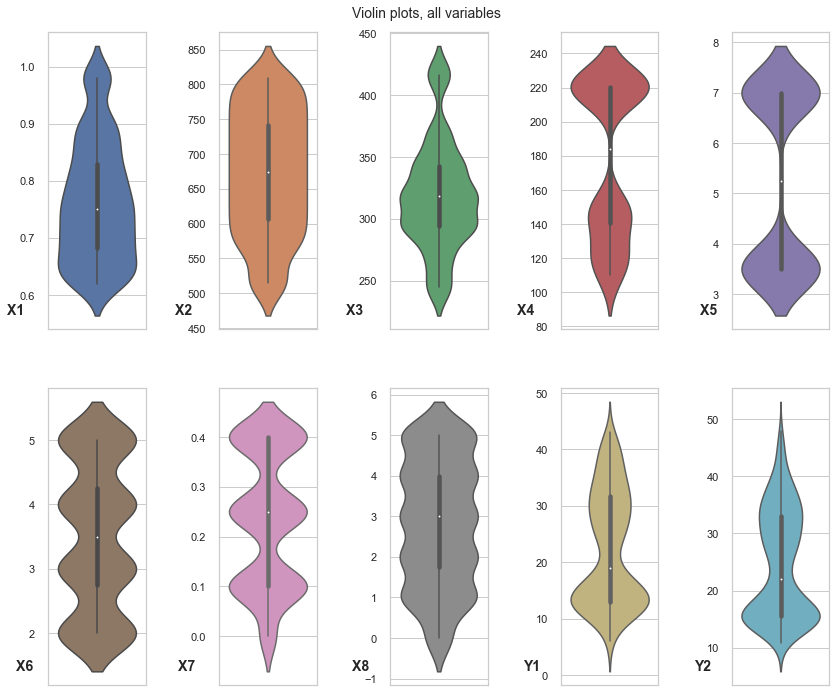

## Many Datasets In One

The data was split first into heat load and cool load projects, each with one target variable and all independent variables.  
Additionally, it was noted that Height has but two values, interpreted as one and two storey buildings. Visualization indicated that each height value was represented by a distinct cluster, with it's own trend versus the target. Accordingly, the data was split again to analyze each cluster separately. This created four subprojects:

1. Heat_lo - Estimate heating load for one storey buildings, 384 observations
2. Heat_hi - Estimate heating load for two storey buildings, 384 observations
3. Cool_lo - Estimate cooling load for one storey buildings, 384 observations
4. Cool_hi - Estimate cooling load for two storey buildings, 384 observations

C:\Users\Robert\anaconda3\envs\desktop-2008\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


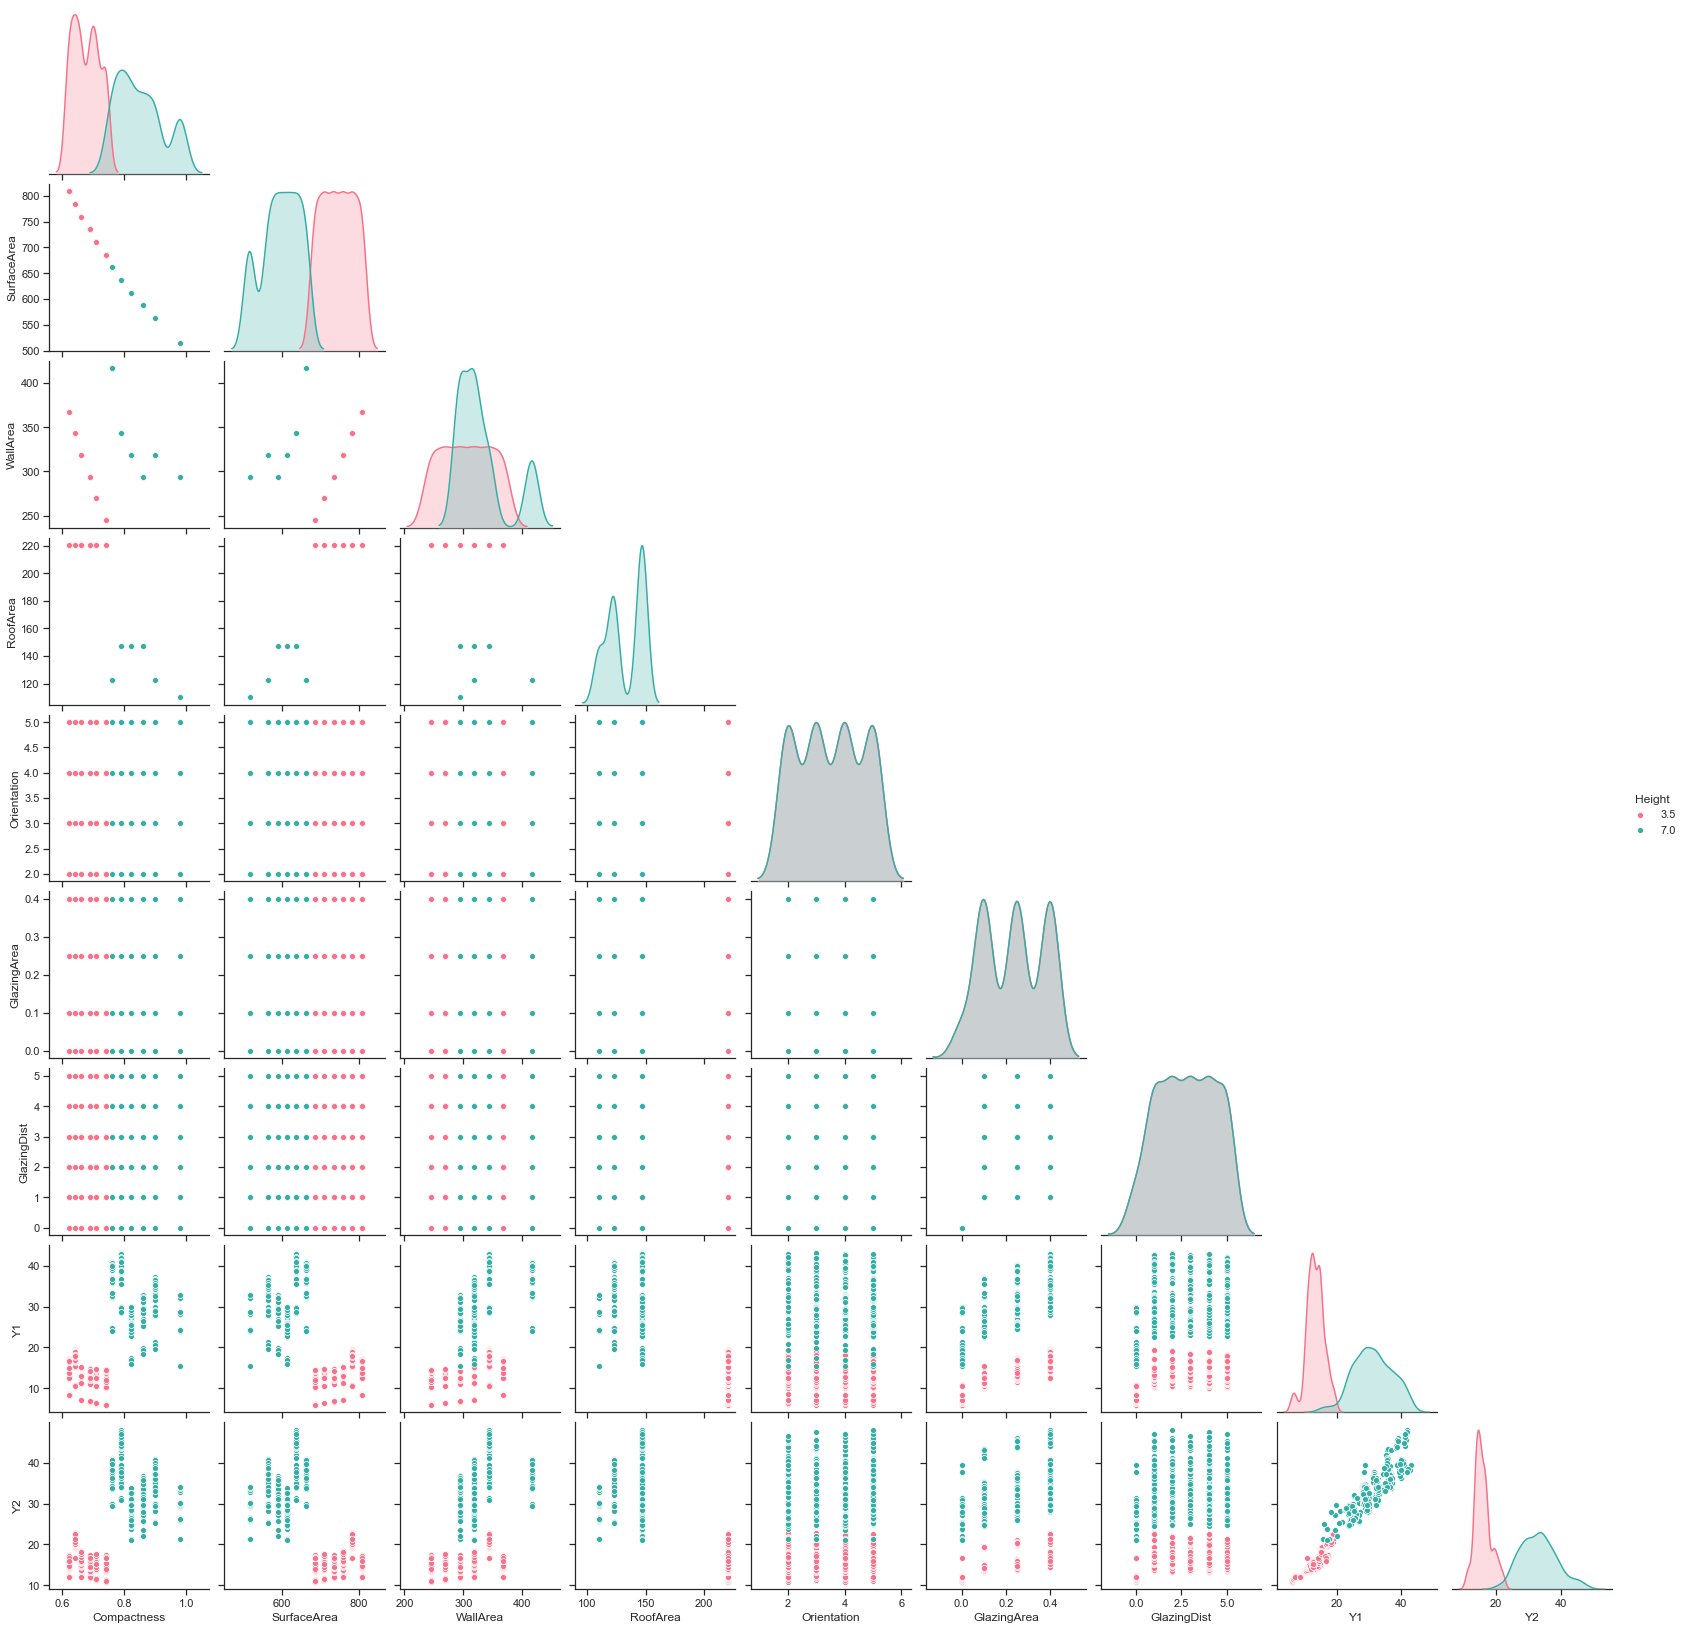

## Correlation Matrices

Pearson's R was calculated for each combination of variables in the four projects.  
As the naming scheme suggests, these datasets had been normalized prior to this step, but as I eventually learned my attempted normalization used the wrong equation.

Despite that, the visually normalized plots before and after the incorrect normalization are analagous, implying the relative contributions of the independent variables in these matrices are representative if not numerically precise.

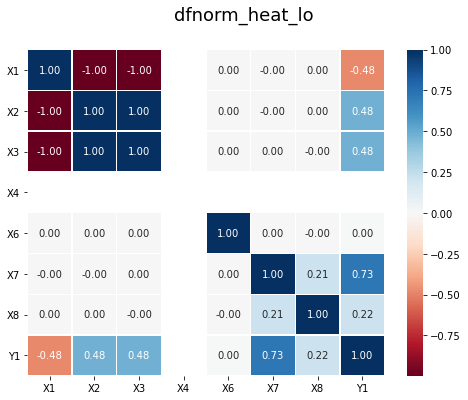

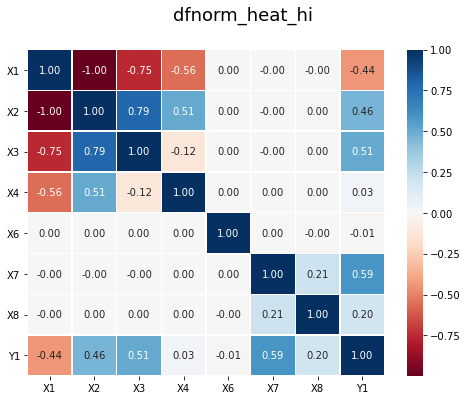

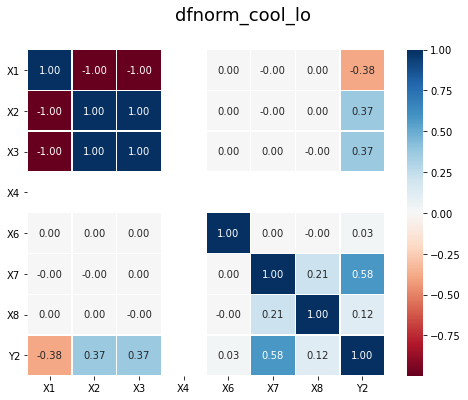

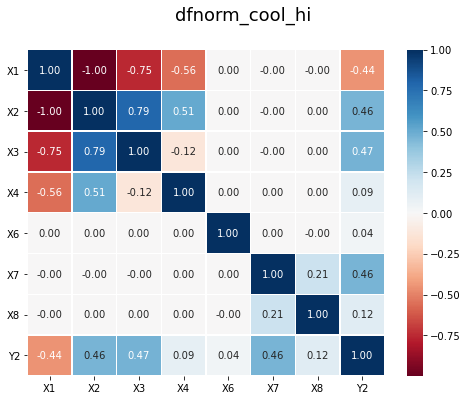

### Selecting Features

Correctly normalizing the data involved more than just using the correct arithmetic. The training and testing sets had to be extracted first, normalization calculated for each training set, and then that same range and Min used to apply normalization to the corresponding testing sets.

Completion of this process rendered normalized training and testing sets for the four subprojects, composed of 345 and 39 observations respectively. These training sets were assessed with SciKit-Learn's Recursive Feature Eliminator with Cross Validation (RFECV) to elicit optimum regression terms.

Optimal number of features for  normcool_hi_train : 5


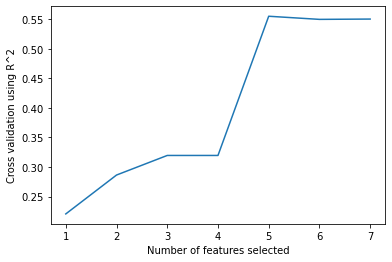

normcool_hi_train
Variable:   Feature Rank:
       Compactness   1
       SurfaceArea   1
       WallArea   1
       RoofArea   1
       Orientation   2
       GlazingArea   1
       GlazingDist   3
Optimal number of features for  normcool_lo_train : 4


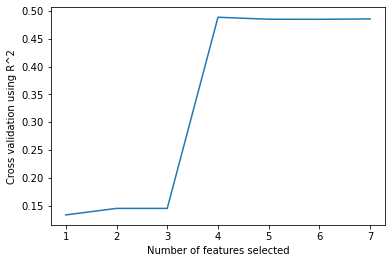

normcool_lo_train
Variable:   Feature Rank:
       Compactness   1
       SurfaceArea   1
       WallArea   1
       RoofArea   4
       Orientation   2
       GlazingArea   1
       GlazingDist   3
Optimal number of features for  normheat_hi_train : 5


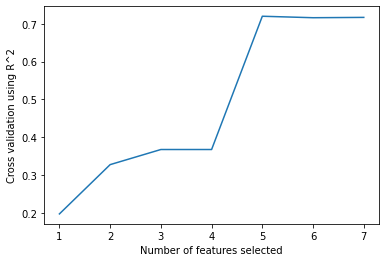

normheat_hi_train
Variable:   Feature Rank:
       Compactness   1
       SurfaceArea   1
       WallArea   1
       RoofArea   1
       Orientation   3
       GlazingArea   1
       GlazingDist   2
Optimal number of features for  normheat_lo_train : 5


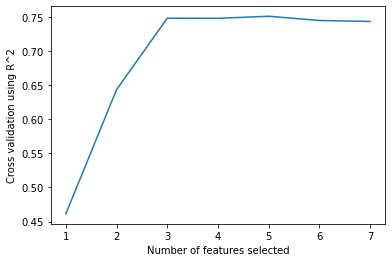

normheat_lo_train
Variable:   Feature Rank:
       Compactness   1
       SurfaceArea   1
       WallArea   1
       RoofArea   3
       Orientation   2
       GlazingArea   1
       GlazingDist   1


## Regression Using Selected Features

Performed using SciKit-Learn's LinearRegression model. Each model is scored by R-squared, RMSE and MAE. The accompanying graph is Y_test vs the prediction from X_test.


Linear Regression Report for:  normcool_hi_train
Variable:   Coefficient:
       Compactness   6.69374730870948
       SurfaceArea   3.409570303101617
       WallArea   2.8849015243032965
       RoofArea   2.01097139903107
       GlazingArea   0.2909269975209678
Intercept: 
 -6.506889812093693

Root mean squared error (Standard error): 0.140
Coefficient of determination (R-squared): 0.467
Mean Absolute Error (MAE): 0.105


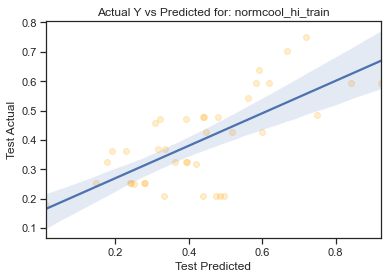


Linear Regression Report for:  normcool_lo_train
Variable:   Coefficient:
       Compactness   -1.25525162442418
       SurfaceArea   3009997429476.894
       WallArea   -3009997429477.921
       GlazingArea   0.35924524674291697
Intercept: 
 1.335528526243997

Root mean squared error (Standard error): 0.145
Coefficient of determination (R-squared): 0.464
Mean Absolute Error (MAE): 0.116


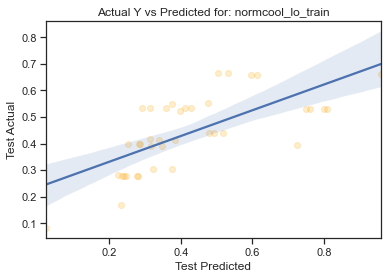


Linear Regression Report for:  normheat_hi_train
Variable:   Coefficient:
       Compactness   7.0094589250482064
       SurfaceArea   29830009474710.14
       WallArea   -24858341228919.1
       RoofArea   -14915004737351.217
       GlazingArea   0.3882844835292095
Intercept: 
 -6.734159497142876

Root mean squared error (Standard error): 0.088
Coefficient of determination (R-squared): 0.785
Mean Absolute Error (MAE): 0.076


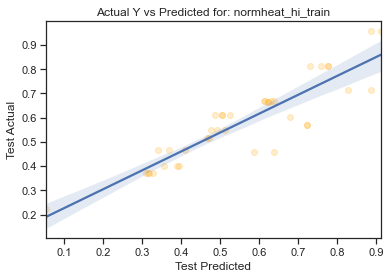


Linear Regression Report for:  normheat_lo_train
Variable:   Coefficient:
       Compactness   0.16013824368648888
       SurfaceArea   0.2195497241076259
       WallArea   0.21954972410762305
       GlazingArea   0.4295931912367898
       GlazingDist   0.0423429505400135
Intercept: 
 -0.028610299330721567

Root mean squared error (Standard error): 0.083
Coefficient of determination (R-squared): 0.725
Mean Absolute Error (MAE): 0.063


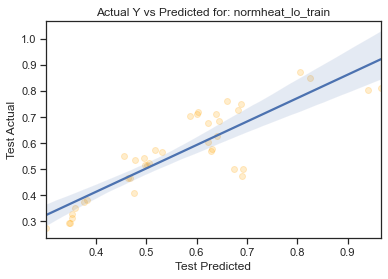

## Interpreting Results

For the heating load datasets, each R-squared value exceeds .70. However, even the best performing dataset for heat load of 2-storey buildings has RMSE = 0.088, which works out to approximately 16% error at the mean test value.  
The cooling load sets are far inferior, at R-squared .467 and .464. Several additional steps were taken with the cooling load datasets to try and raise those scores.

Contemplating the relationships between the independent variables,  it was noted that SurfaceArea is a linear function of two other variabless: sum of Wall Area and two times the Roof Area. With this in mind, and the strong cross-correlation between SurfaceArea and Relative Compactness, regressions were rerun without SurfaceArea. Unfortunately, this netted no change in the R-squared results.

The next idea was based on another basic pairplot visualization, observing values for GlazingArea. Like with Height, each value appeared to cluster a separate trend, although not as distinctly.

C:\Users\Robert\anaconda3\envs\desktop-2008\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Robert\anaconda3\envs\desktop-2008\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Robert\anaconda3\envs\desktop-2008\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Robert\anaconda3\envs\desktop-2008\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Robert\anaconda3\envs\desktop-2008\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarn

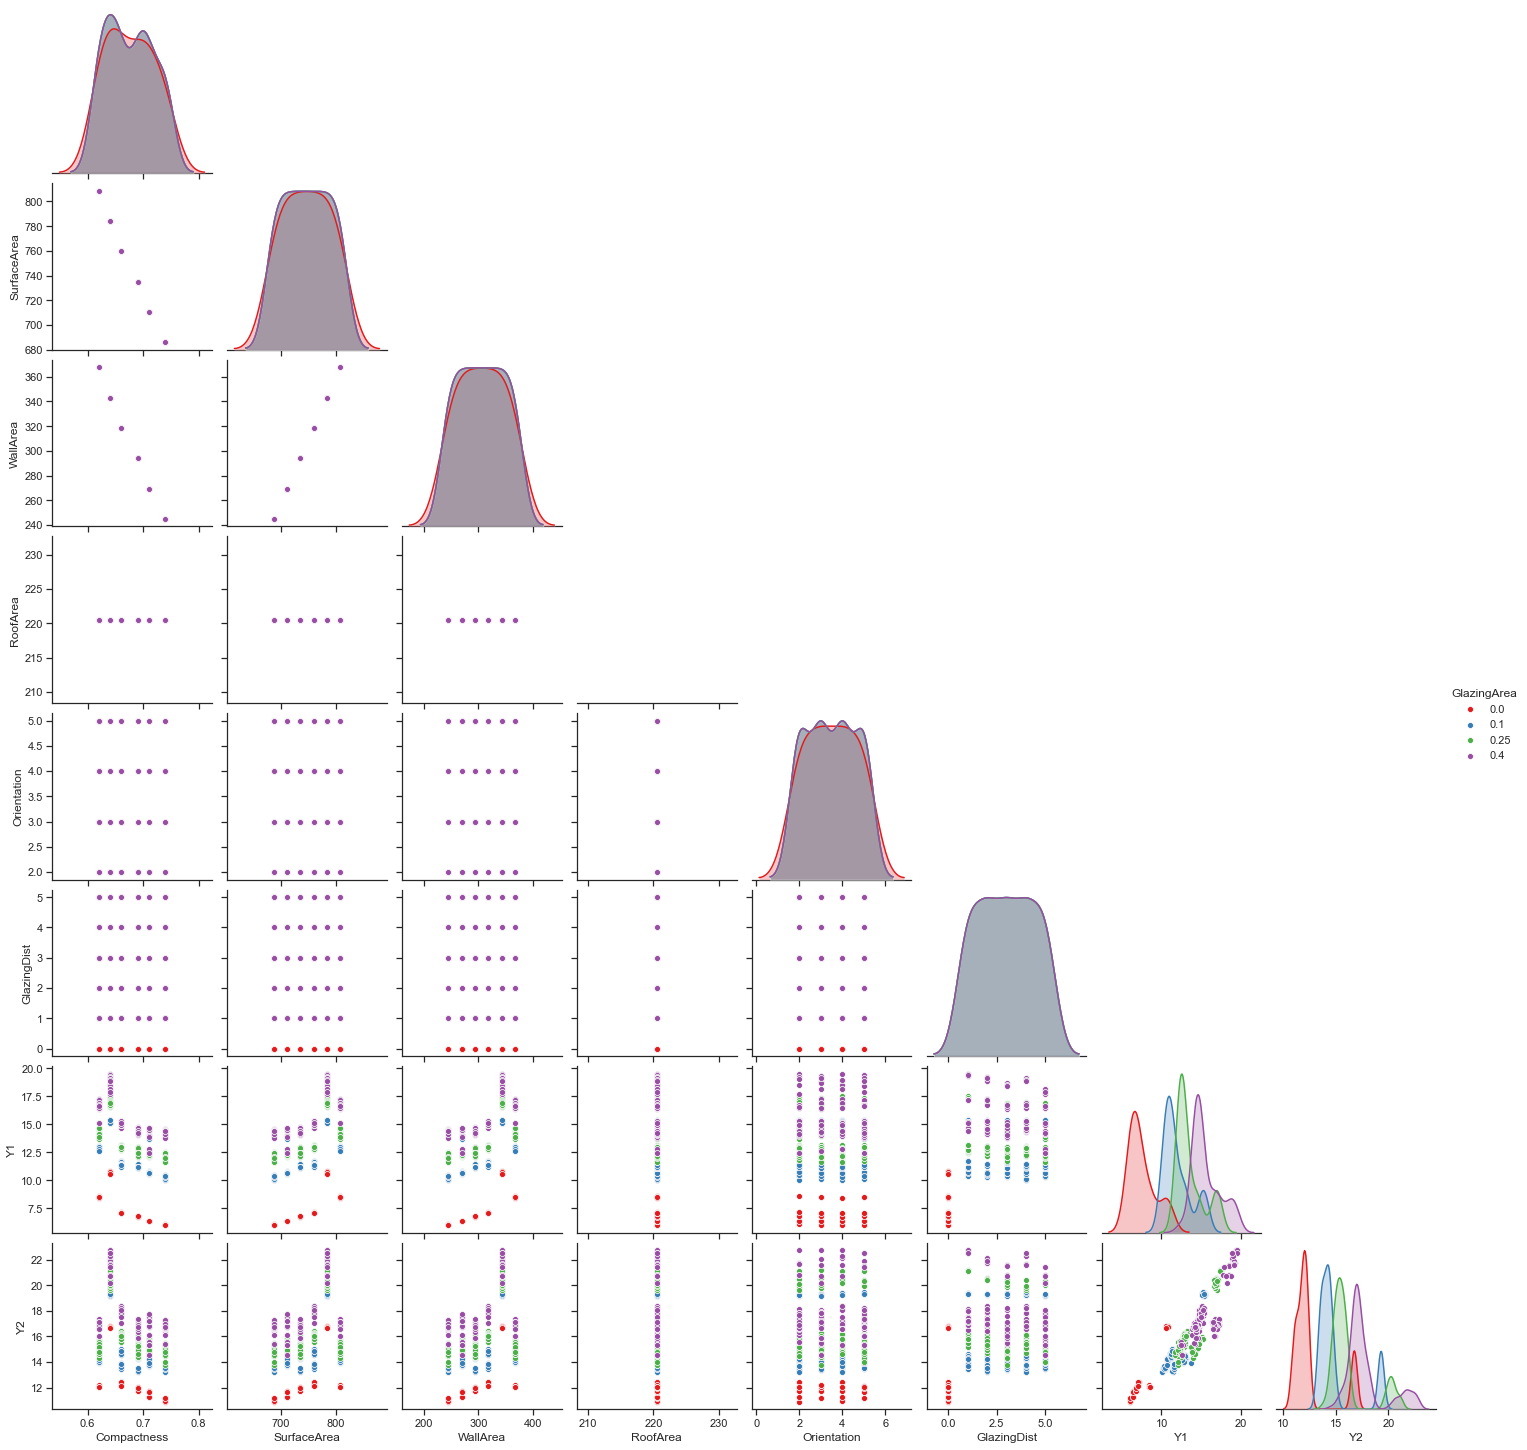

## One-Hot Encoding

Although the datatype of GlazingArea is float and the value relates to a measurement of the house model, it also looks like a categorical variable. To test whether this interpretation was beneficial, GlazingArea was converted to 4 dummy variables. The regressions were run with all four and also with one removed to address the multicolinearity issue known as the "dummy variable trap." Results in each case were identical.


Linear Regression Report for:  dummycool_hi_train
Variable:   Coefficient:
       Compactness   6.690374375882118
       SurfaceArea   3.407703100557614
       RoofArea   2.0102390907885317
       WallArea   2.883100266196019
       GA_0.0   -0.1790212067090072
       GA_0.25   -0.043400338463255805
       GA_0.625   0.06511946386574148
       GA_1.0   0.1573020813065213
Intercept: 
 -6.377781582383728

Root mean squared error (Standard error): 0.135
Coefficient of determination (R-squared): 0.505
Mean Absolute Error (MAE): 0.102


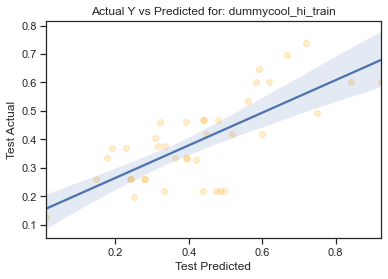


Linear Regression Report for:  dummycool_lo_train
Variable:   Coefficient:
       Compactness   -1.2796877676174196
       SurfaceArea   -0.5250764657339342
       WallArea   -0.5250764657339344
       GA_0.0   -0.2379828699400637
       GA_0.25   -0.03231593645915909
       GA_0.625   0.0672238303779439
       GA_1.0   0.203074976021279
Intercept: 
 1.5089704420324748

Root mean squared error (Standard error): 0.147
Coefficient of determination (R-squared): 0.449
Mean Absolute Error (MAE): 0.122


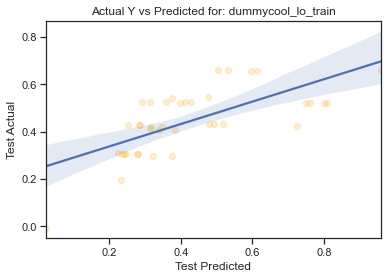

## Minor Improvement

The cooling load for two-storey buildings model finally exceeded 0.50 using dummy variables for GlazingArea. Unfortunately, the one-storey cooling load weakened slightly, from 0.464 to 0.449.  
The tally on best model for each dataset is as follows: 

1. Heat_lo - Estimate heating load for one storey buildings: R-squared 0.725
2. Heat_hi - Estimate heating load for two storey buildings: R-squared 0.785
3. Cool_lo - Estimate cooling load for one storey buildings: R-squared 0.464
4. Cool_hi - Estimate cooling load for two storey buildings: R-squared 0.505

The good news here is that this dataset assumes a climate that uses more heating than cooling, as mean and percentiles of the heating load variable exceed that of cooling load. Thus the heat load is the majority of HVAC expenditures for this population, and this model has more utility than one which prioritizes cooling load accuracy.

[Return to TOC](#toc)